In [63]:
import sys
import io
import os
import numpy as np
import time
import pygame
import pandas as pd

# Imports des modules
from src.rl_environments.TwoRoundRPS import TwoRoundRPSEnvironment
from src.rl_environments.line_world import LineWorld
from src.rl_environments.grid_world import GridWorld
from src.rl_environments.monty_hall_interactive import MontyHallInteractive
from src.rl_environments.monty_hall2_stepbystep import MontyHall2StepByStep
#from src.rl_environments.monty_hall2 import MontyHall2
from src.rl_environments.monty_hall2_deterministe import MontyHall2
from src.rl_environments.TwoRoundRPS import TwoRoundRPSEnvironment
from src.rl_algorithms.q_learning import QLearning
from utils.agent import Agent
from utils.human_player import HumanPlayer

A utiliser pour analyser un algorithme:
algorithm.get_training_results()
agent.evaluate_performance(success_criterion = "positive_reward")
success_criterion dépend de l'environnement qu'on étudie (se référer à la méthode dans la classe Agent)
a = algorithm.visualize_q_table()
print(a)
algorithm.plot_training_curves()

## Apprentissage de l'algorithme q_learning

Les hyperparamètres:
- learning_rate: float
Contrôle à quelle vitesse les nouvelles informations remplacent les anciennes.
Plage typique : 0.01 à 0.5
Trop petit : apprentissage lent
Trop grand : instabilité
L’agent n’apprend pas (les Q-values ne changent pas beaucoup) → augmenter α
L’apprentissage est instable / oscillant → réduire α
Commencer à 0.2 et ajuste selon la stabilité des récompenses.

- gamma: float
Pondère l’importance des récompenses futures.
Plage typique : 0.9 à 0.99
γ proche de 0 → myope (récompenses immédiates)
γ proche de 1 → long terme
L’agent a besoin de penser long terme (ex: Monty Hall) → utiliser γ ≈ 0.99
Tu veux un comportement plus court-terme → γ ≈ 0.9
Dans la plupart des cas, 0.95 est un bon point de départ.

- epsilon: float 
Utilisé dans la stratégie ε-greedy pour équilibrer exploration vs exploitation.
Plage typique : 0.1 à 0.3
Peut être fixe ou décroissant au fil du temps (epsilon decay)
L’agent stagne à une politique sous-optimale → remonter ε ou ralentir la décroissance
L’agent met trop de temps à converger → réduire ε plus vite
Valeur initiale typique : 1.0 (100% exploration au début)
EXPLORATION avec epsilon
EXPLOITATION avec 1-epsilon

- epsilon_decay
Vitesse à laquelle ε diminue
0.99 à 0.9999 par épisode

- Nombre d'épisodes
Combien de fois l’agent explore et apprend l’environnement.
Dépend de la complexité de l’environnement
Valeur typique :
Simples : 500 à 2 000 épisodes (LineWorld, RPS)
Plus complexes : 5 000+ (Monty Hall niveau 2)
Courbe de récompense ne converge pas → augmenter les épisodes
Pour tester rapidement → commencer avec 500, puis augmenter

nb episodes exploration= log(ϵmin/ϵ0) / log(ϵdecay)

### Line world

In [2]:
env_lineworld = LineWorld()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1
}
    
algorithm_ql_line = QLearning.from_config(config_ql, env_lineworld)
algorithm_ql_line.train(env_lineworld, num_episodes=1000, verbose=False)
    
agent_ql_line = Agent(algorithm_ql_line, env_lineworld, "Agent_ql_line")

✅ Agent créé: Agent_ql_line


In [3]:
agent_ql_line.evaluate_performance(success_criterion = "target_reached", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_line
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 1.00
Progression: 20% - Récompense moyenne: 1.00
Progression: 30% - Récompense moyenne: 1.00
Progression: 40% - Récompense moyenne: 1.00
Progression: 50% - Récompense moyenne: 1.00
Progression: 60% - Récompense moyenne: 1.00
Progression: 70% - Récompense moyenne: 1.00
Progression: 80% - Récompense moyenne: 1.00
Progression: 90% - Récompense moyenne: 1.00
Progression: 100% - Récompense moyenne: 1.00

✅ RÉSULTATS:
Environnement: LineWorld
Récompense moyenne: 1.00 ± 0.00
Taux de succès: 100.0% (critère: target_reached)
Longueur moyenne: 2.0 étapes
Temps d'évaluation: 0.01s



{'agent_name': 'Agent_ql_line',
 'environment': 'LineWorld',
 'num_episodes': 1000,
 'avg_reward': np.float64(1.0),
 'std_reward': np.float64(0.0),
 'min_reward': np.float64(1.0),
 'max_reward': np.float64(1.0),
 'avg_episode_length': np.float64(2.0),
 'success_rate': 1.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.011466026306152344,
 'timestamp': '2025-07-17T15:24:04.259565'}

In [4]:
a = algorithm_ql_line.visualize_q_table()
print(a)


Q-TABLE - QLearning
État  Action0       Action1       Politique Valeur    
--------------------------------------------------
0     0.00         0.00         0         0.00      
1     -1.00        0.90         1         0.90      
2     0.86         0.95         1         0.95      
3     0.90         1.00         1         1.00      
4     0.00         0.00         0         0.00      



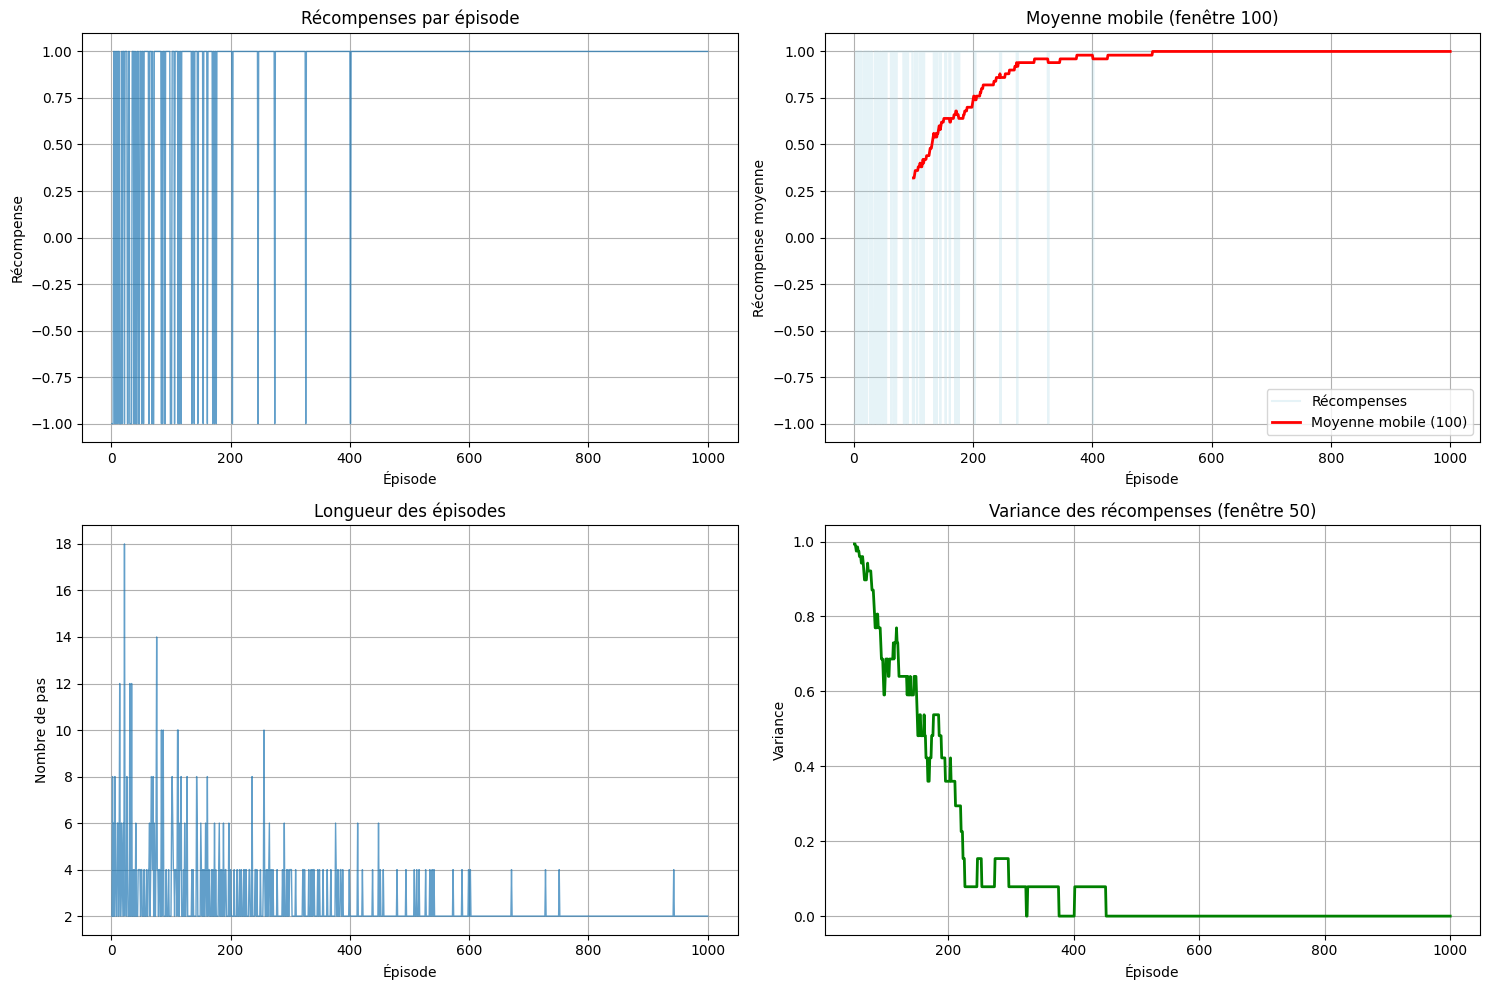

In [5]:
algorithm_ql_line.plot_training_curves()

Q-learning apprend très vite pour le line world car cet environnement est très simple. Il suffit d'aller 2 fois à droite pour finir.

In [24]:
env_lineworld = LineWorld()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 0.5
}
    
algorithm_ql_line = QLearning.from_config(config_ql, env_lineworld)
algorithm_ql_line.train(env_lineworld, num_episodes=1000, verbose=False)
    
agent_ql_line = Agent(algorithm_ql_line, env_lineworld, "Agent_ql_line")

✅ Agent créé: Agent_ql_line


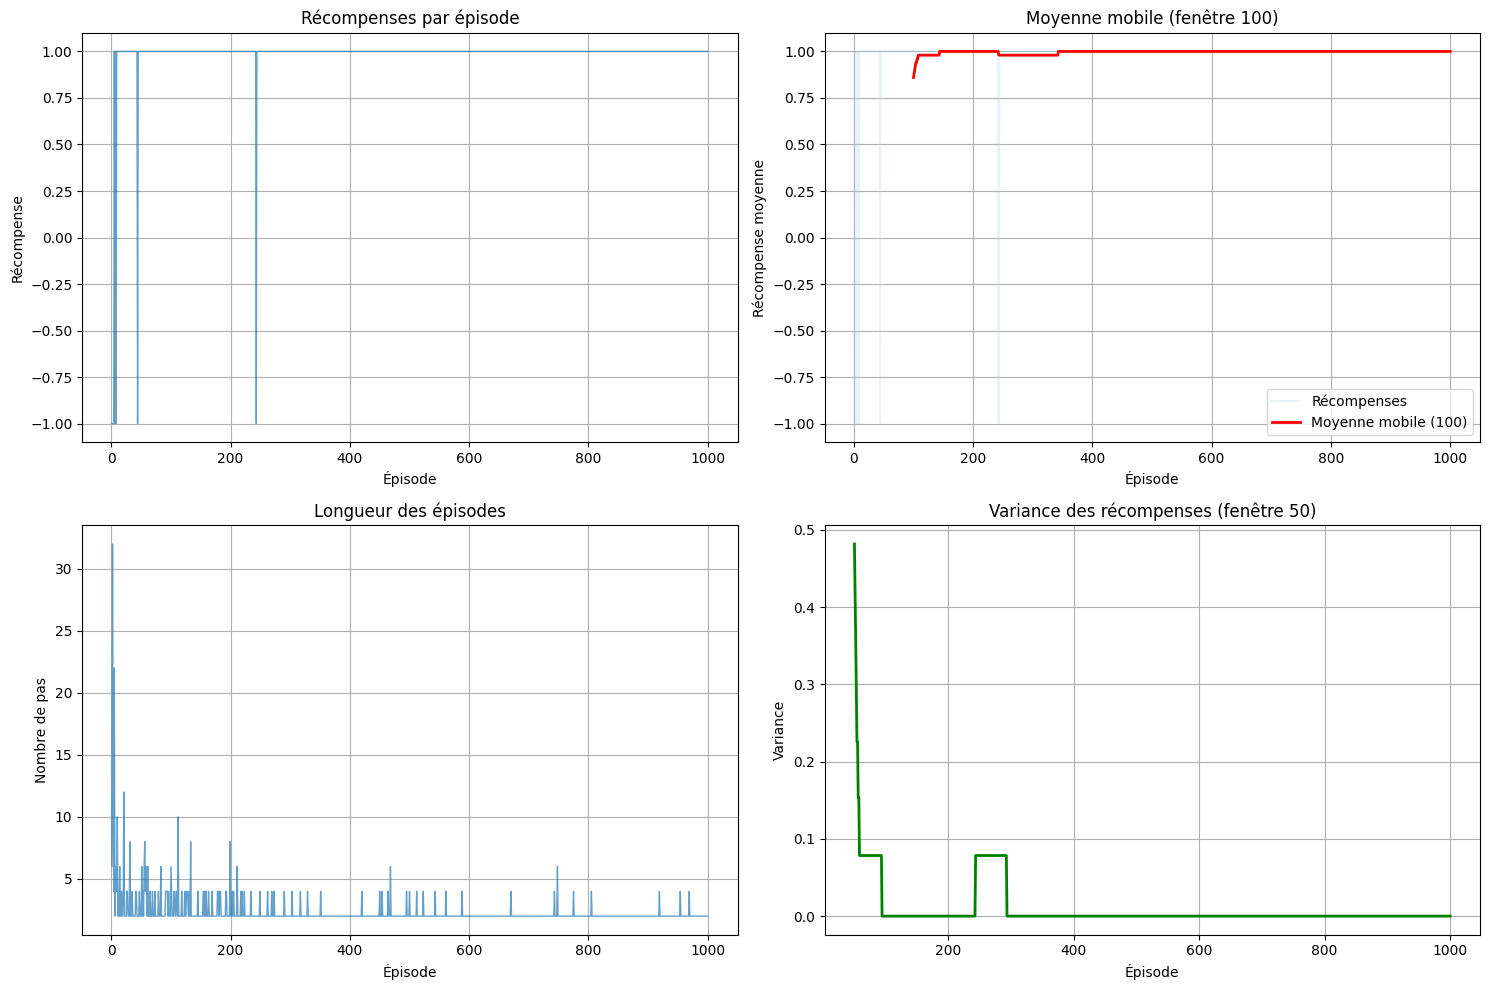

In [25]:
algorithm_ql_line.plot_training_curves()

✅ Agent créé: Agent_ql_line


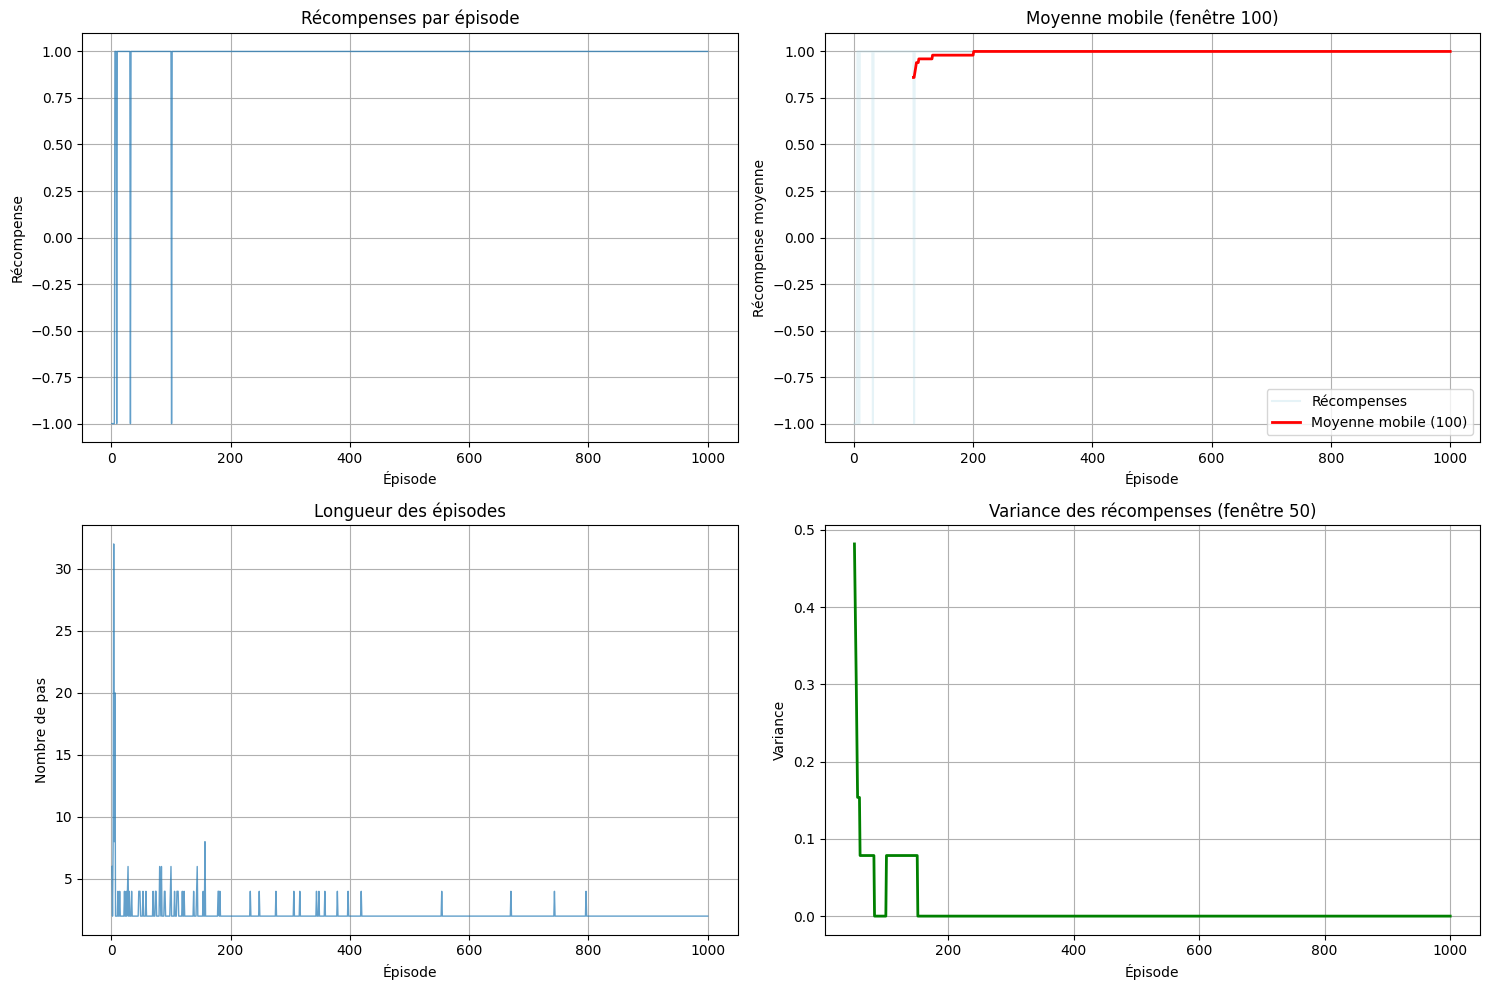

In [26]:
env_lineworld = LineWorld()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 0.3
}
    
algorithm_ql_line = QLearning.from_config(config_ql, env_lineworld)
algorithm_ql_line.train(env_lineworld, num_episodes=1000, verbose=False)
    
agent_ql_line = Agent(algorithm_ql_line, env_lineworld, "Agent_ql_line")

algorithm_ql_line.plot_training_curves()

✅ Agent créé: Agent_ql_line


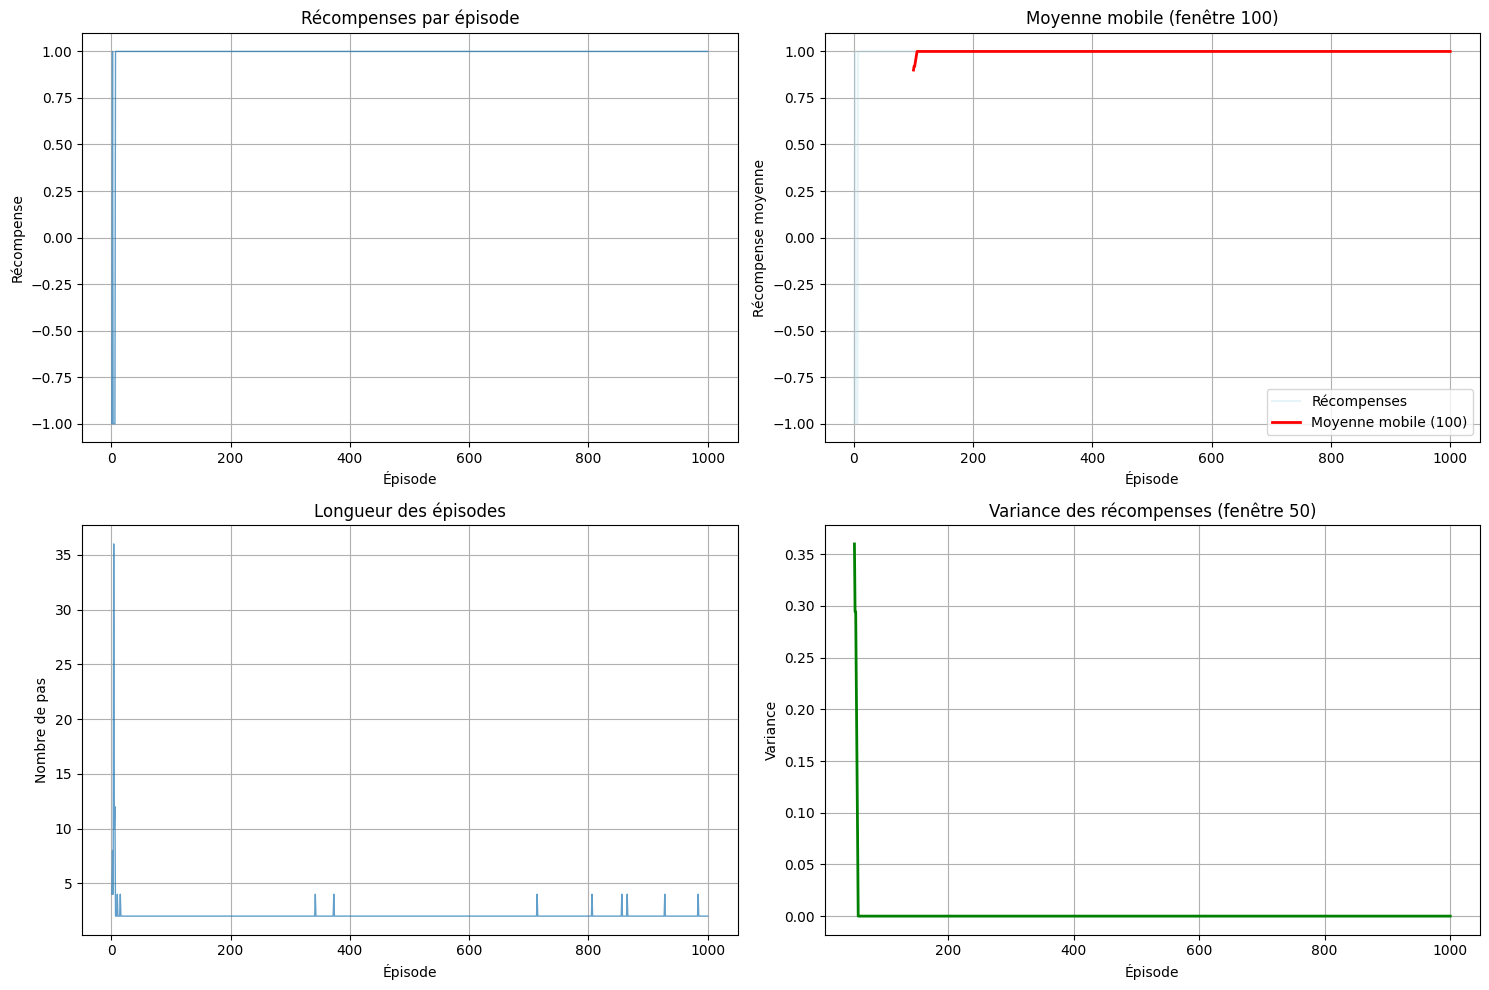

In [2]:
# Meilleure config
env_lineworld = LineWorld()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 0.3,
    'epsilon_decay': 0.9
}
    
algorithm_ql_line = QLearning.from_config(config_ql, env_lineworld)
algorithm_ql_line.train(env_lineworld, num_episodes=1000, verbose=False)
    
agent_ql_line = Agent(algorithm_ql_line, env_lineworld, "Agent_ql_line")

algorithm_ql_line.plot_training_curves()

In [3]:
agent_ql_line.evaluate_performance(success_criterion = "target_reached", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_line
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 1.00
Progression: 20% - Récompense moyenne: 1.00
Progression: 30% - Récompense moyenne: 1.00
Progression: 40% - Récompense moyenne: 1.00
Progression: 50% - Récompense moyenne: 1.00
Progression: 60% - Récompense moyenne: 1.00
Progression: 70% - Récompense moyenne: 1.00
Progression: 80% - Récompense moyenne: 1.00
Progression: 90% - Récompense moyenne: 1.00
Progression: 100% - Récompense moyenne: 1.00

✅ RÉSULTATS:
Environnement: LineWorld
Récompense moyenne: 1.00 ± 0.00
Taux de succès: 100.0% (critère: target_reached)
Longueur moyenne: 2.0 étapes
Temps d'évaluation: 0.02s



{'agent_name': 'Agent_ql_line',
 'environment': 'LineWorld',
 'num_episodes': 1000,
 'avg_reward': np.float64(1.0),
 'std_reward': np.float64(0.0),
 'min_reward': np.float64(1.0),
 'max_reward': np.float64(1.0),
 'avg_episode_length': np.float64(2.0),
 'success_rate': 1.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.020598888397216797,
 'timestamp': '2025-07-19T16:39:11.247230'}

In [4]:
a = algorithm_ql_line.visualize_q_table()
print(a)


Q-TABLE - QLearning
État  Action0       Action1       Politique Valeur    
--------------------------------------------------
0     0.00         0.00         0         0.00      
1     -0.67        0.67         1         0.67      
2     0.31         0.95         1         0.95      
3     0.40         1.00         1         1.00      
4     0.00         0.00         0         0.00      



Le modèle apprend très vite le line world même si epsilon decay est faible et donc qu'on a moins d'exploration (très peu, environs 32 épisodes d'exploration) -> la stratégie optimale est très vite trouvée

### Grid world

In [2]:
env_gridworld = GridWorld()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1
}
    
algorithm_ql_grid = QLearning.from_config(config_ql, env_gridworld)
algorithm_ql_grid.train(env_gridworld, num_episodes=1000, verbose=False)
    
agent_ql_grid = Agent(algorithm_ql_grid, env_gridworld, "Agent_ql_grid")

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [3]:
b = algorithm_ql_grid.visualize_q_table()
print(b)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Politique Valeur    
--------------------------------------------------
0     0.00         0.95         0.00         0.95         3         0.95      
1     0.00         2.05         -0.10        2.05         3         2.05      
2     0.00         3.21         0.95         3.21         1         3.21      
3     0.00         4.44         1.64         3.77         1         4.44      
4     0.00         5.61         2.12         0.00         1         5.61      
5     -0.28        2.05         0.00         1.99         1         2.05      
6     0.89         3.15         0.41         3.21         3         3.21      
7     2.04         4.44         2.05         4.44         1         4.44      
8     3.11         5.72         3.04         5.70         1         5.72      
9     3.50         7.07         4.40         0.00         1         7.07      
10    0.26         2.50         0.00         3.21      

In [4]:
agent_ql_grid.evaluate_performance(success_criterion = "target_reached", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_grid
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 3.00
Progression: 20% - Récompense moyenne: 3.00
Progression: 30% - Récompense moyenne: 3.00
Progression: 40% - Récompense moyenne: 3.00
Progression: 50% - Récompense moyenne: 3.00
Progression: 60% - Récompense moyenne: 3.00
Progression: 70% - Récompense moyenne: 3.00
Progression: 80% - Récompense moyenne: 3.00
Progression: 90% - Récompense moyenne: 3.00
Progression: 100% - Récompense moyenne: 3.00

✅ RÉSULTATS:
Environnement: GridWorld
Récompense moyenne: 3.00 ± 0.00
Taux de succès: 0.0% (critère: target_reached)
Longueur moyenne: 8.0 étapes
Temps d'évaluation: 0.04s



{'agent_name': 'Agent_ql_grid',
 'environment': 'GridWorld',
 'num_episodes': 1000,
 'avg_reward': np.float64(3.0),
 'std_reward': np.float64(0.0),
 'min_reward': np.float64(3.0),
 'max_reward': np.float64(3.0),
 'avg_episode_length': np.float64(8.0),
 'success_rate': 0.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.03505206108093262,
 'timestamp': '2025-07-18T22:52:49.261039'}

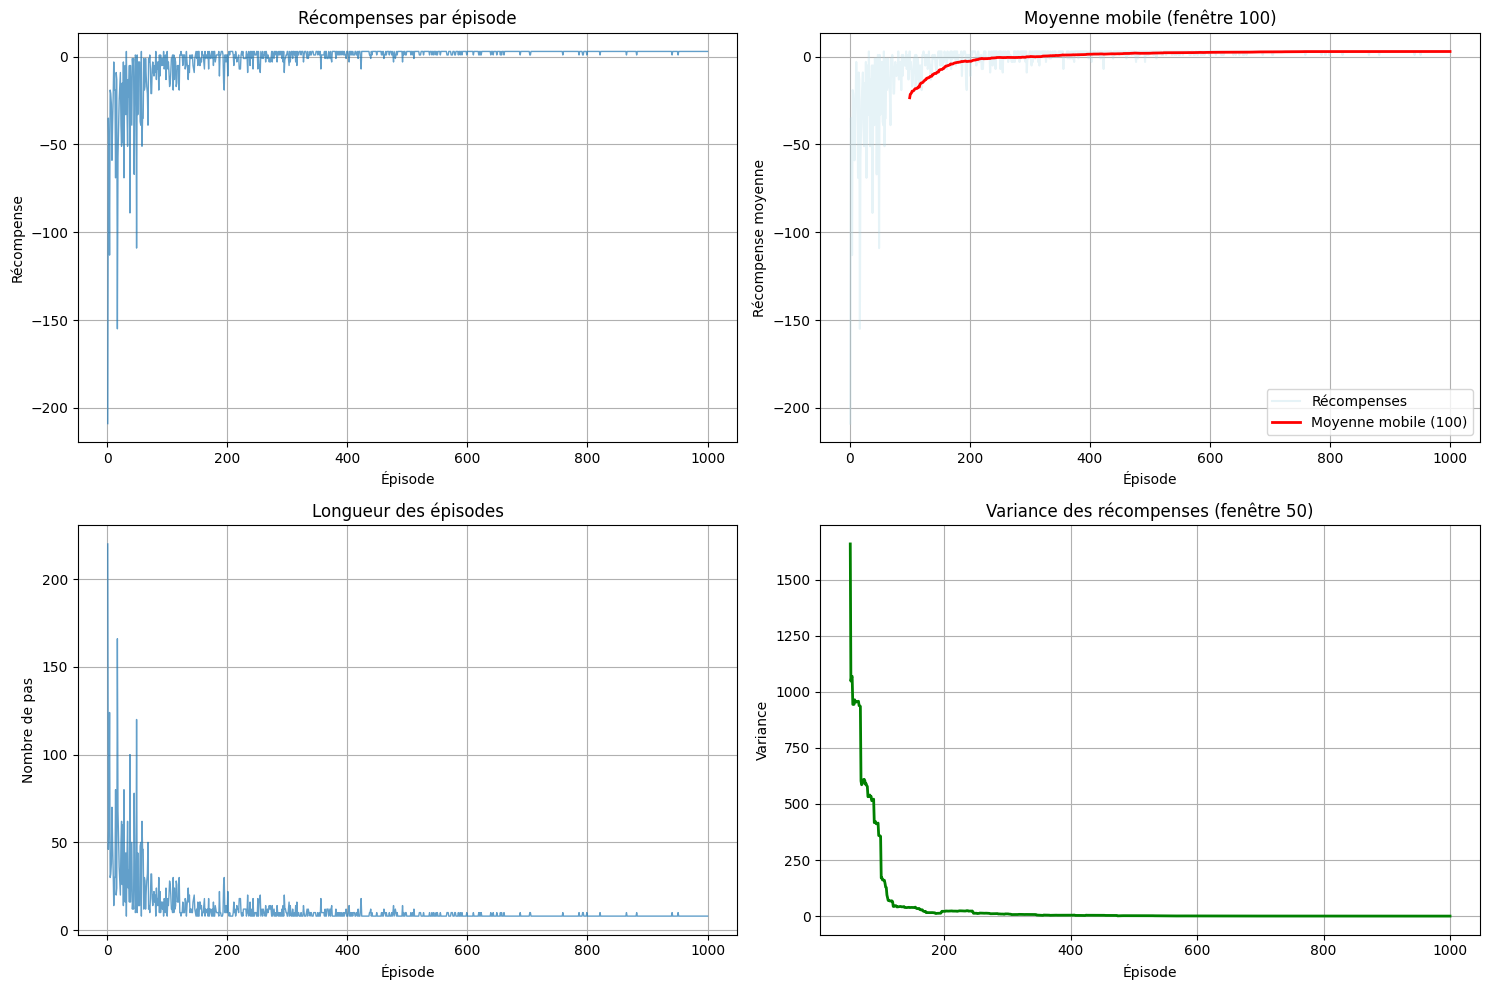

In [5]:
algorithm_ql_grid.plot_training_curves()

L'agent apprend parfaitement l'environnement même avec des hyperparamètres de base.
Il converge très rapidement vers la politique optimale et reste très stable.

### Two round RPS

Stratégie optimale: se servir de ce que l'agent a joué au 1er round pour choisir une action qui le fera gagner ou obtenir un match nul. Au round 1, aucue stratégie car l'adversaire joue de manière aléatoire

Ce qu'il faut regarder dans la table Q:
Les états 1,2,3 contiennent la même informations.
De même que les états 4,5,6 et les états 7,8,9.
Il faut juste vérifier que la bonne action est prise dépendamment de ce l'agent a joué au round 1

In [10]:
env_rps = TwoRoundRPSEnvironment()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1
}
    
algorithm_ql_rps = QLearning.from_config(config_ql, env_rps)
algorithm_ql_rps.train(env_rps, num_episodes=1000, verbose=False)
    
agent_ql_rps = Agent(algorithm_ql_rps, env_rps, "Agent_ql_rps")

✅ Agent créé: Agent_ql_rps


In [3]:
agent_ql_rps.evaluate_performance(success_criterion = "positive_reward", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_rps
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 0.99
Progression: 20% - Récompense moyenne: 0.94
Progression: 30% - Récompense moyenne: 0.99
Progression: 40% - Récompense moyenne: 1.00
Progression: 50% - Récompense moyenne: 1.00
Progression: 60% - Récompense moyenne: 0.99
Progression: 70% - Récompense moyenne: 1.00
Progression: 80% - Récompense moyenne: 1.00
Progression: 90% - Récompense moyenne: 1.01
Progression: 100% - Récompense moyenne: 1.01

✅ RÉSULTATS:
Environnement: TwoRoundRPSEnvironment
Récompense moyenne: 1.01 ± 0.82
Taux de succès: 66.9% (critère: positive_reward)
Longueur moyenne: 2.0 étapes
Temps d'évaluation: 0.03s



{'agent_name': 'Agent_ql_rps',
 'environment': 'TwoRoundRPSEnvironment',
 'num_episodes': 1000,
 'avg_reward': np.float64(1.007),
 'std_reward': np.float64(0.8178942474427853),
 'min_reward': np.float64(0.0),
 'max_reward': np.float64(2.0),
 'avg_episode_length': np.float64(2.0),
 'success_rate': 0.669,
 'success_criterion': 'positive_reward',
 'evaluation_time': 0.03012704849243164,
 'timestamp': '2025-07-17T19:15:17.527331'}

In [4]:
e = algorithm_ql_rps.visualize_q_table()
print(e)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Politique Valeur    
--------------------------------------------------
0     0.40         0.56         1.38         2         1.38      
1     0.00         1.00         -0.89        1         1.00      
2     0.00         1.00         -0.67        1         1.00      
3     0.00         1.00         -0.95        1         1.00      
4     -0.89        0.00         1.00         2         1.00      
5     -0.91        0.00         1.00         2         1.00      
6     -0.89        0.00         1.00         2         1.00      
7     1.00         -0.67        0.00         0         1.00      
8     1.00         -0.67        0.00         0         1.00      
9     1.00         -0.67        0.00         0         1.00      
10    0.00         0.00         0.00         0         0.00      



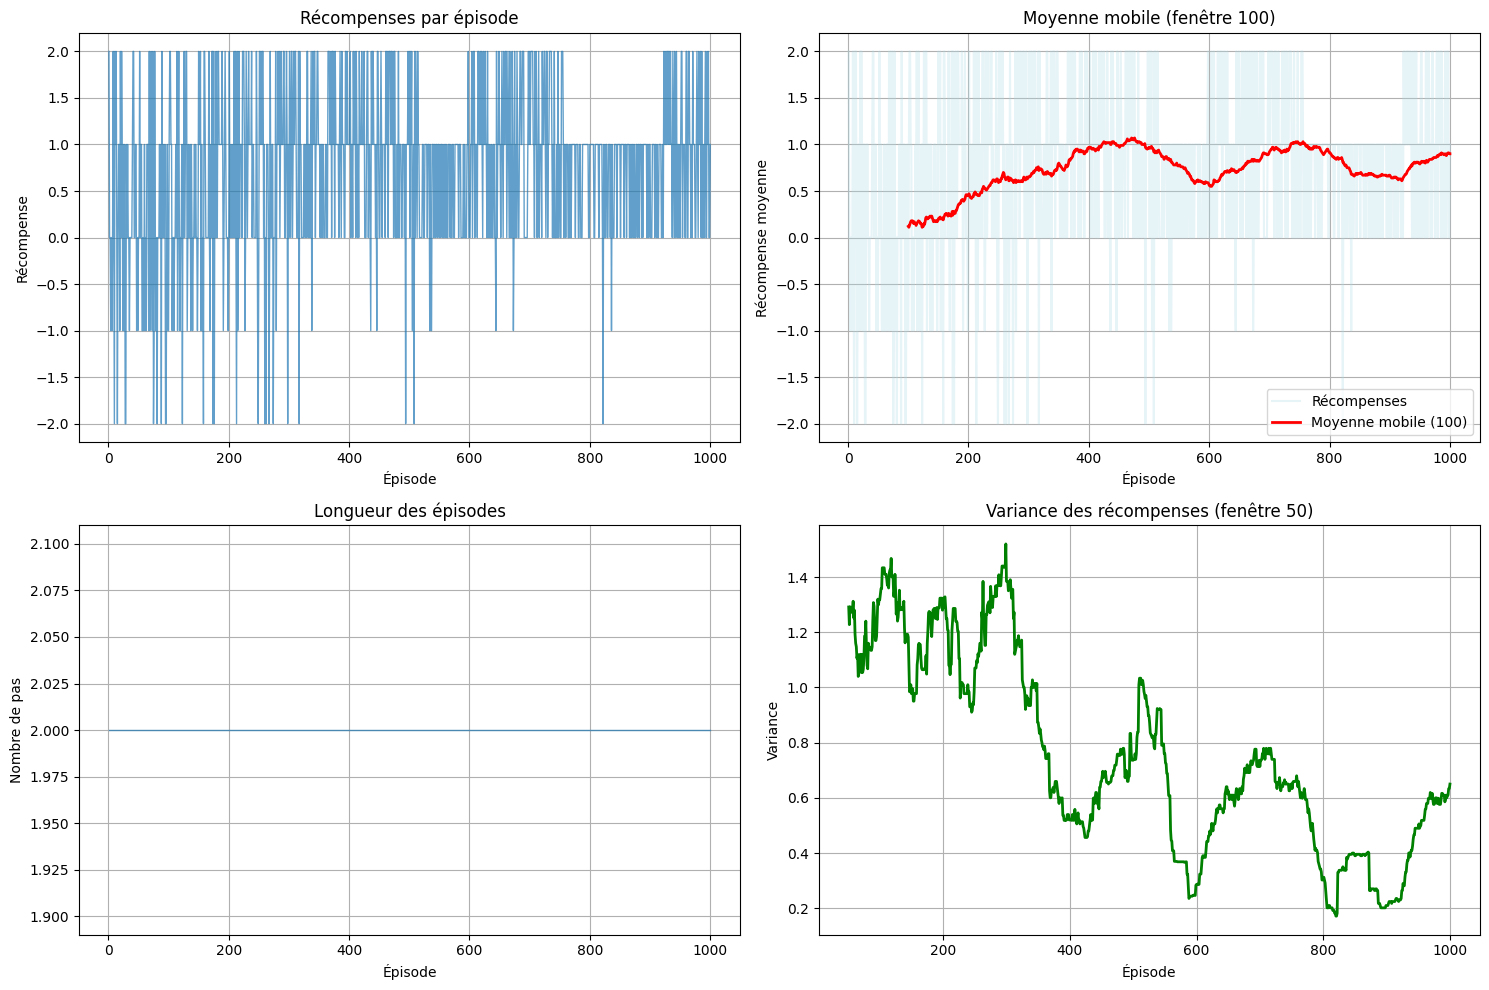

In [11]:
algorithm_ql_rps.plot_training_curves()

Phase initiale : forte exploration, récompenses très variables, moyenne autour de 0
Apprentissage : l’agent découvre progressivement la stratégie optimale, mène à une moyenne mobile en augmentation vers 1
Convergence : la moyenne se stabilise assez vite (300 épisodes) entre 0.8 et 1.1, tandis que la variance diminue; stratégie bien apprise
Longueur d’épisode est stable à 2 → pas d’anomalies dans l’environnement

La phase d'exploration est quand même très grande (environ 919 épisodes). Augmmentons le nombre d'épisodes ou diminuons la phase d'exploration

In [67]:
env_rps = TwoRoundRPSEnvironment()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1
}
    
algorithm_ql_rps = QLearning.from_config(config_ql, env_rps)
algorithm_ql_rps.train(env_rps, num_episodes=2000, verbose=False)
    
agent_ql_rps = Agent(algorithm_ql_rps, env_rps, "Agent_ql_rps")

✅ Agent créé: Agent_ql_rps


In [68]:
agent_ql_rps.evaluate_performance(success_criterion = "positive_reward", num_episodes=2000)


📊 ÉVALUATION: Agent_ql_rps
Épisodes d'évaluation: 2000
Progression: 10% - Récompense moyenne: 0.97
Progression: 20% - Récompense moyenne: 0.99
Progression: 30% - Récompense moyenne: 1.02
Progression: 40% - Récompense moyenne: 1.03
Progression: 50% - Récompense moyenne: 0.99
Progression: 60% - Récompense moyenne: 0.99
Progression: 70% - Récompense moyenne: 1.00
Progression: 80% - Récompense moyenne: 1.01
Progression: 90% - Récompense moyenne: 1.00
Progression: 100% - Récompense moyenne: 1.01

✅ RÉSULTATS:
Environnement: TwoRoundRPSEnvironment
Récompense moyenne: 1.01 ± 0.82
Taux de succès: 66.8% (critère: positive_reward)
Longueur moyenne: 2.0 étapes
Temps d'évaluation: 0.05s



{'agent_name': 'Agent_ql_rps',
 'environment': 'TwoRoundRPSEnvironment',
 'num_episodes': 2000,
 'avg_reward': np.float64(1.0095),
 'std_reward': np.float64(0.820615470241696),
 'min_reward': np.float64(0.0),
 'max_reward': np.float64(2.0),
 'avg_episode_length': np.float64(2.0),
 'success_rate': 0.668,
 'success_criterion': 'positive_reward',
 'evaluation_time': 0.04578995704650879,
 'timestamp': '2025-07-18T19:37:31.881480'}

In [69]:
e = algorithm_ql_rps.visualize_q_table()
print(e)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Politique Valeur    
--------------------------------------------------
0     0.87         0.19         0.28         0         0.87      
1     0.00         1.00         -0.79        1         1.00      
2     0.00         1.00         -0.79        1         1.00      
3     0.00         1.00         -0.89        1         1.00      
4     -0.96        0.00         1.00         2         1.00      
5     -0.91        0.00         1.00         2         1.00      
6     -0.67        0.00         1.00         2         1.00      
7     1.00         -0.20        0.00         0         1.00      
8     1.00         -0.59        0.00         0         1.00      
9     1.00         -0.59        0.00         0         1.00      
10    0.00         0.00         0.00         0         0.00      



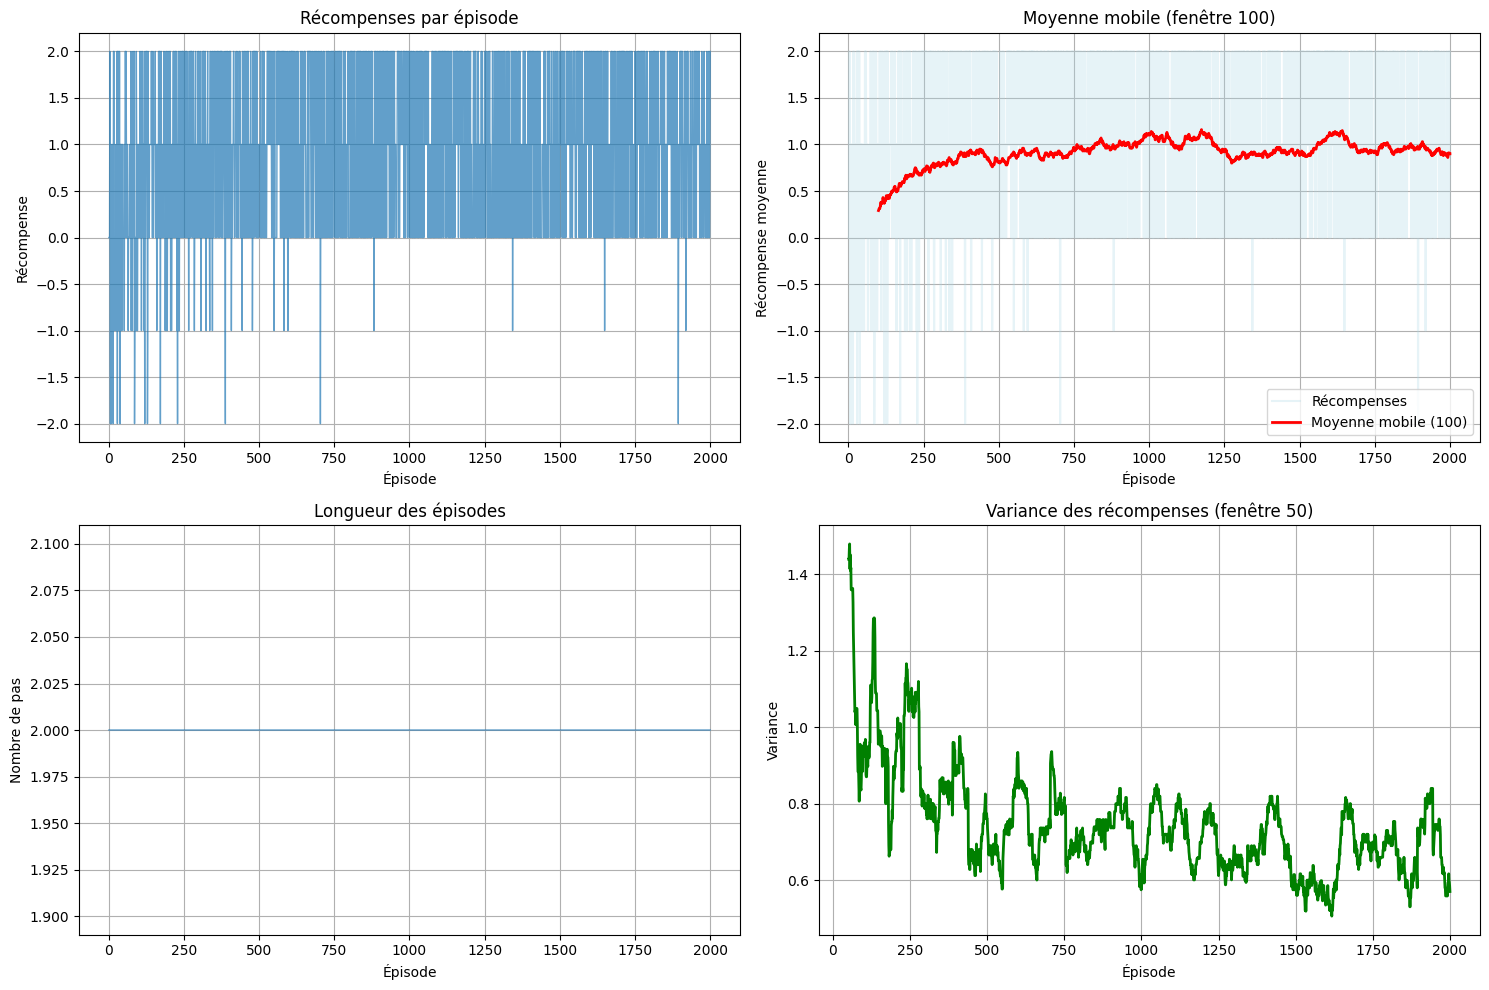

In [70]:
algorithm_ql_rps.plot_training_curves()

En augmentant le nombre d'épisodes, nous remarquons une plus longue phase d'exploitation et on remarque que l'agent apprend très bien l'environnement

In [66]:
#Meilleure configuration (après analyse)
env_rps = TwoRoundRPSEnvironment()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.99
}
    
algorithm_ql_rps = QLearning.from_config(config_ql, env_rps)
algorithm_ql_rps.train(env_rps, num_episodes=1000, verbose=False)
    
agent_ql_rps = Agent(algorithm_ql_rps, env_rps, "Agent_ql_rps")

✅ Agent créé: Agent_ql_rps


In [59]:
agent_ql_rps.evaluate_performance(success_criterion = "positive_reward", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_rps
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 0.97
Progression: 20% - Récompense moyenne: 1.00
Progression: 30% - Récompense moyenne: 0.95
Progression: 40% - Récompense moyenne: 0.96
Progression: 50% - Récompense moyenne: 0.97
Progression: 60% - Récompense moyenne: 0.96
Progression: 70% - Récompense moyenne: 0.97
Progression: 80% - Récompense moyenne: 0.96
Progression: 90% - Récompense moyenne: 0.97
Progression: 100% - Récompense moyenne: 0.98

✅ RÉSULTATS:
Environnement: TwoRoundRPSEnvironment
Récompense moyenne: 0.98 ± 0.79
Taux de succès: 67.2% (critère: positive_reward)
Longueur moyenne: 2.0 étapes
Temps d'évaluation: 0.02s



{'agent_name': 'Agent_ql_rps',
 'environment': 'TwoRoundRPSEnvironment',
 'num_episodes': 1000,
 'avg_reward': np.float64(0.976),
 'std_reward': np.float64(0.794621922677697),
 'min_reward': np.float64(0.0),
 'max_reward': np.float64(2.0),
 'avg_episode_length': np.float64(2.0),
 'success_rate': 0.672,
 'success_criterion': 'positive_reward',
 'evaluation_time': 0.02250194549560547,
 'timestamp': '2025-07-18T19:20:48.200381'}

In [60]:
e = algorithm_ql_rps.visualize_q_table()
print(e)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Politique Valeur    
--------------------------------------------------
0     0.94         0.32         0.65         0         0.94      
1     0.00         1.00         -0.79        1         1.00      
2     0.00         1.00         -0.36        1         1.00      
3     0.00         1.00         -0.20        1         1.00      
4     -0.36        0.00         1.00         2         1.00      
5     -0.49        0.00         1.00         2         1.00      
6     -0.49        0.00         1.00         2         1.00      
7     1.00         -0.49        0.00         0         1.00      
8     1.00         -0.74        0.00         0         1.00      
9     1.00         0.00         0.00         0         1.00      
10    0.00         0.00         0.00         0         0.00      



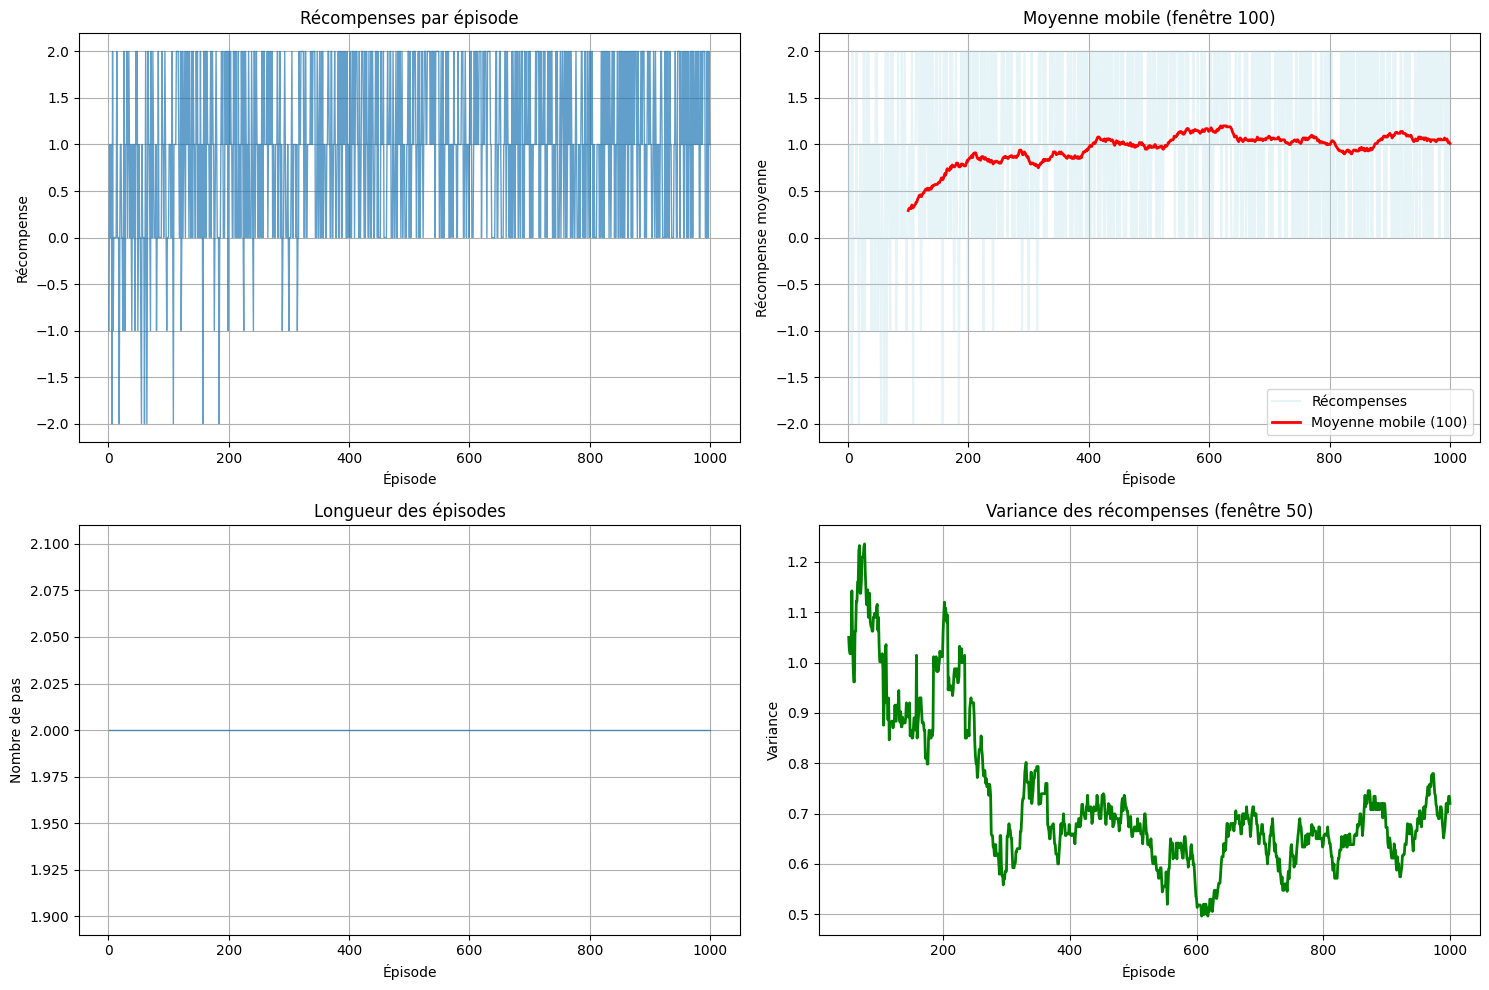

In [61]:
algorithm_ql_rps.plot_training_curves()

Malgrè un epsilon qui diminue rapidement (exploitation commence aux alentours de 459 épisodes), l'agent apprend très bien. Il converge toujours rapidement et fais bien moins d'erreur

In [62]:
env_rps = TwoRoundRPSEnvironment()
    
config_ql = {
    'learning_rate': 0.3,
    'gamma': 0.95,
    'epsilon': 0.8
}
    
algorithm_ql_rps = QLearning.from_config(config_ql, env_rps)
algorithm_ql_rps.train(env_rps, num_episodes=1000, verbose=False)
    
agent_ql_rps = Agent(algorithm_ql_rps, env_rps, "Agent_ql_rps")

✅ Agent créé: Agent_ql_rps


In [63]:
agent_ql_rps.evaluate_performance(success_criterion = 
"positive_reward", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_rps
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 0.92
Progression: 20% - Récompense moyenne: 0.93
Progression: 30% - Récompense moyenne: 0.92
Progression: 40% - Récompense moyenne: 0.95
Progression: 50% - Récompense moyenne: 0.94
Progression: 60% - Récompense moyenne: 0.96
Progression: 70% - Récompense moyenne: 0.96
Progression: 80% - Récompense moyenne: 0.98
Progression: 90% - Récompense moyenne: 0.98
Progression: 100% - Récompense moyenne: 0.98

✅ RÉSULTATS:
Environnement: TwoRoundRPSEnvironment
Récompense moyenne: 0.98 ± 0.82
Taux de succès: 65.0% (critère: positive_reward)
Longueur moyenne: 2.0 étapes
Temps d'évaluation: 0.03s



{'agent_name': 'Agent_ql_rps',
 'environment': 'TwoRoundRPSEnvironment',
 'num_episodes': 1000,
 'avg_reward': np.float64(0.978),
 'std_reward': np.float64(0.8231136009081614),
 'min_reward': np.float64(0.0),
 'max_reward': np.float64(2.0),
 'avg_episode_length': np.float64(2.0),
 'success_rate': 0.65,
 'success_criterion': 'positive_reward',
 'evaluation_time': 0.02770400047302246,
 'timestamp': '2025-07-18T19:28:15.708957'}

In [64]:
e = algorithm_ql_rps.visualize_q_table()
print(e)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Politique Valeur    
--------------------------------------------------
0     0.25         0.18         1.19         2         1.19      
1     0.00         1.00         -0.76        1         1.00      
2     0.00         1.00         -0.88        1         1.00      
3     0.00         1.00         -0.30        1         1.00      
4     -0.98        0.00         1.00         2         1.00      
5     -0.83        0.00         1.00         2         1.00      
6     -0.92        0.00         1.00         2         1.00      
7     1.00         -0.66        0.00         0         1.00      
8     1.00         -0.66        0.00         0         1.00      
9     1.00         -0.66        0.00         0         1.00      
10    0.00         0.00         0.00         0         0.00      



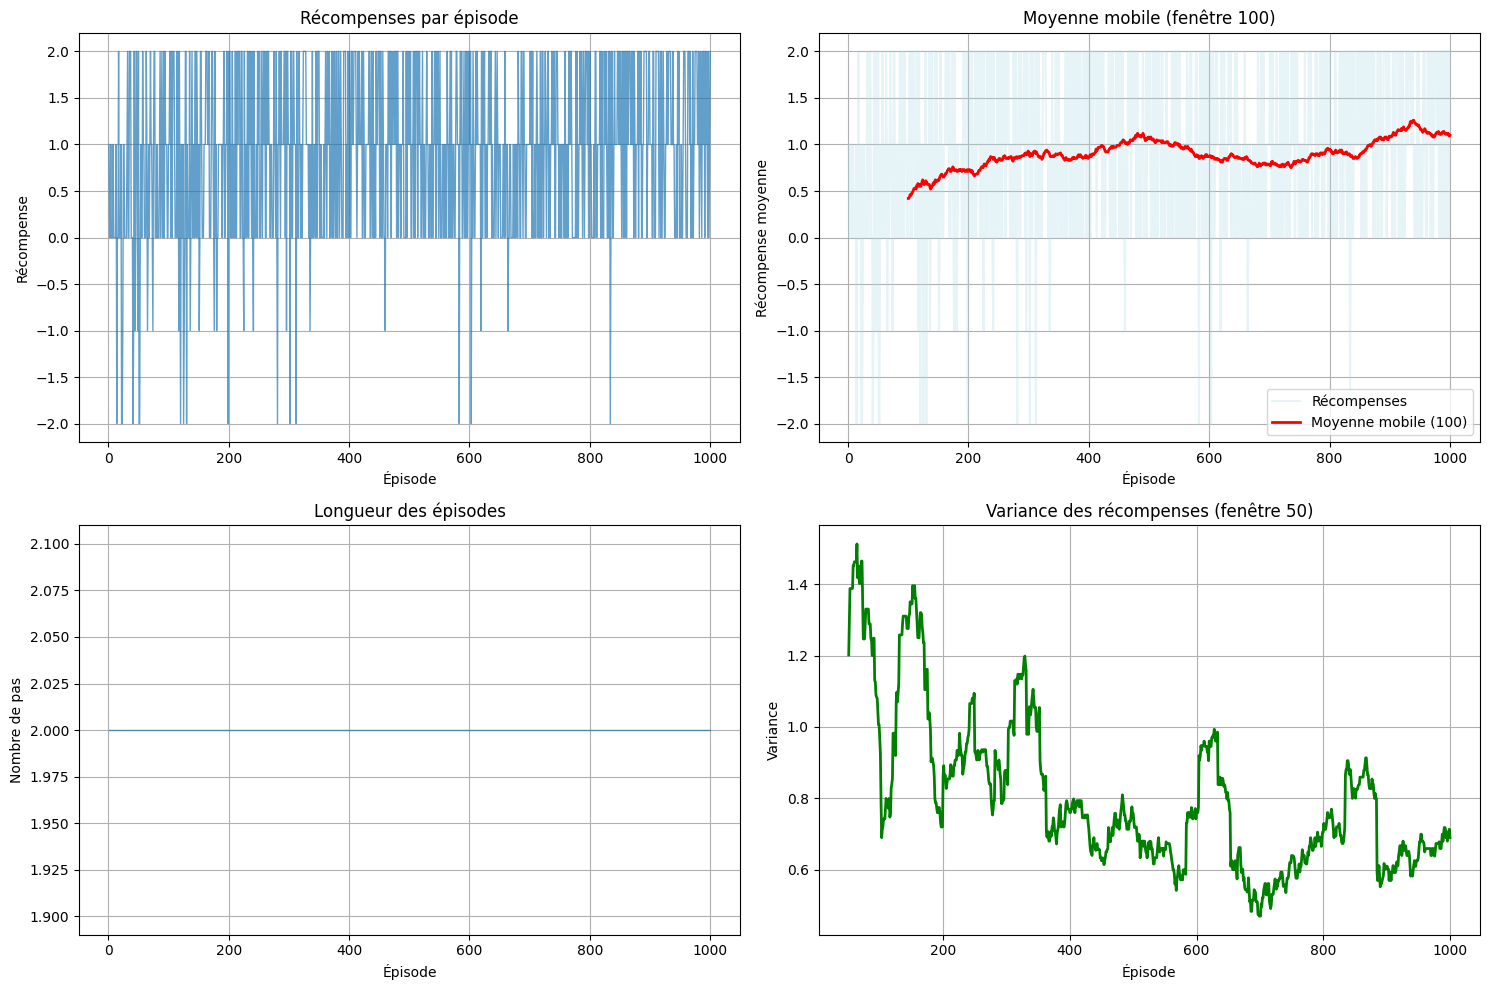

In [65]:
algorithm_ql_rps.plot_training_curves()

Le modèle apprend quand même moins bien

In [71]:
env_rps = TwoRoundRPSEnvironment()
    
config_ql = {
    'learning_rate': 0.3,
    'gamma': 0.95,
    'epsilon': 0.8,
    'epsilon_decay': 0.99
}
    
algorithm_ql_rps = QLearning.from_config(config_ql, env_rps)
algorithm_ql_rps.train(env_rps, num_episodes=1000, verbose=False)
    
agent_ql_rps = Agent(algorithm_ql_rps, env_rps, "Agent_ql_rps")

✅ Agent créé: Agent_ql_rps


In [72]:
agent_ql_rps.evaluate_performance(success_criterion = 
"positive_reward", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_rps
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 0.93
Progression: 20% - Récompense moyenne: 0.89
Progression: 30% - Récompense moyenne: 0.92
Progression: 40% - Récompense moyenne: 0.95
Progression: 50% - Récompense moyenne: 0.96
Progression: 60% - Récompense moyenne: 0.98
Progression: 70% - Récompense moyenne: 0.98
Progression: 80% - Récompense moyenne: 1.00
Progression: 90% - Récompense moyenne: 1.00
Progression: 100% - Récompense moyenne: 0.99

✅ RÉSULTATS:
Environnement: TwoRoundRPSEnvironment
Récompense moyenne: 0.99 ± 0.82
Taux de succès: 66.0% (critère: positive_reward)
Longueur moyenne: 2.0 étapes
Temps d'évaluation: 0.02s



{'agent_name': 'Agent_ql_rps',
 'environment': 'TwoRoundRPSEnvironment',
 'num_episodes': 1000,
 'avg_reward': np.float64(0.993),
 'std_reward': np.float64(0.8203359068089121),
 'min_reward': np.float64(0.0),
 'max_reward': np.float64(2.0),
 'avg_episode_length': np.float64(2.0),
 'success_rate': 0.66,
 'success_criterion': 'positive_reward',
 'evaluation_time': 0.02477431297302246,
 'timestamp': '2025-07-18T19:48:45.250086'}

In [73]:
e = algorithm_ql_rps.visualize_q_table()
print(e)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Politique Valeur    
--------------------------------------------------
0     0.96         0.07         0.68         0         0.96      
1     0.00         1.00         -0.51        1         1.00      
2     0.00         1.00         -0.51        1         1.00      
3     0.00         1.00         0.00         1         1.00      
4     -0.30        0.00         0.97         2         0.97      
5     -0.51        0.00         0.00         1         0.00      
6     -0.51        0.00         0.92         2         0.92      
7     1.00         -0.96        0.00         0         1.00      
8     1.00         -0.66        0.00         0         1.00      
9     1.00         -0.88        0.00         0         1.00      
10    0.00         0.00         0.00         0         0.00      



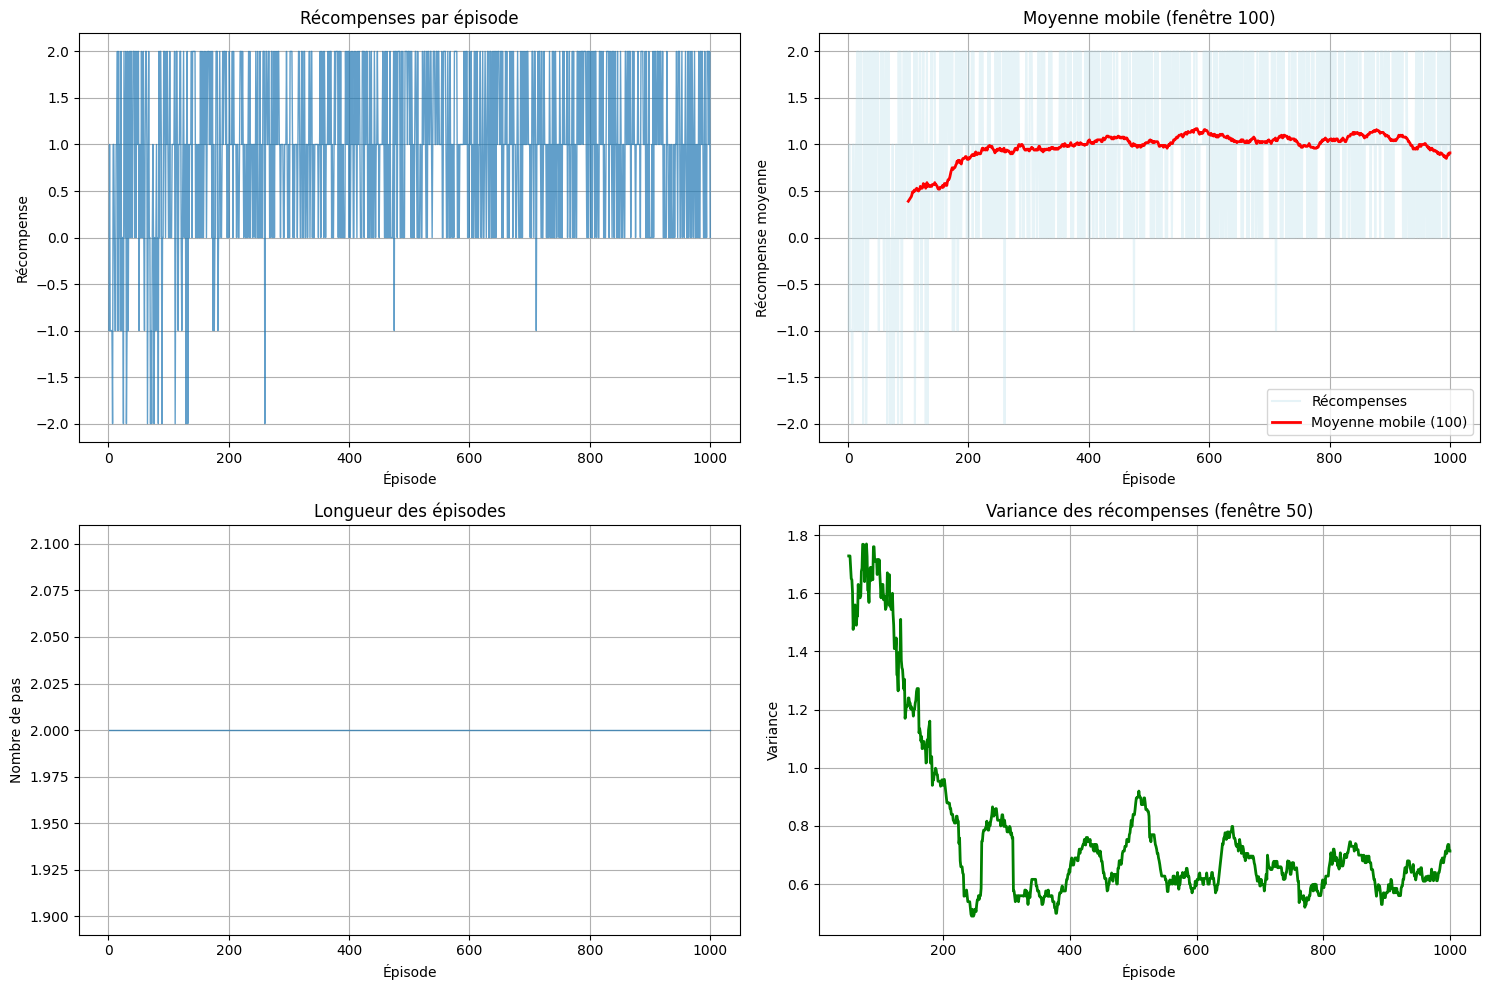

In [74]:
algorithm_ql_rps.plot_training_curves()

l'agent converge rapidement vers 1 et reste stable
la variance également diminue très vite 
peu d'erreurs dans la phase exploitation (commence à environs 436 épisodes)
cependant en observant la q table, on se rend compte qu'il n'apprend pas si bien que ça la politique optimale

### Monty Hall 1

Stratégie optimale : TOUJOURS CHANGER


Si la porte gagnante est A (prob 1/3) → changer vous fait perdre

Si la porte gagnante est B (prob 1/3) → l'animateur retire C, changer vers B vous fait gagner

Si la porte gagnante est C (prob 1/3) → l'animateur retire B, changer vers C vous fait gagner

Résultat : changer gagne dans 2 cas sur 3.

In [39]:
env_hall1 = MontyHallInteractive()
    
config_ql = {
    'learning_rate': 0.3,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.995
}
    
algorithm_ql_hall1 = QLearning.from_config(config_ql, env_hall1)
algorithm_ql_hall1.train(env_hall1, num_episodes=1000, verbose=False)
    
agent_ql_hall1 = Agent(algorithm_ql_hall1, env_hall1, "Agent_ql_hall1")

✅ Agent créé: Agent_ql_hall1


In [40]:
agent_ql_hall1.evaluate_performance(success_criterion = "target_reached")


📊 ÉVALUATION: Agent_ql_hall1
Épisodes d'évaluation: 100
Progression: 10% - Récompense moyenne: 1.70
Progression: 20% - Récompense moyenne: 1.40
Progression: 30% - Récompense moyenne: 1.20
Progression: 40% - Récompense moyenne: 1.18
Progression: 50% - Récompense moyenne: 1.16
Progression: 60% - Récompense moyenne: 1.15
Progression: 70% - Récompense moyenne: 1.10
Progression: 80% - Récompense moyenne: 1.14
Progression: 90% - Récompense moyenne: 1.10
Progression: 100% - Récompense moyenne: 1.10

✅ RÉSULTATS:
Environnement: MontyHallInteractive
Récompense moyenne: 1.10 ± 1.37
Taux de succès: 0.0% (critère: target_reached)
Longueur moyenne: 2.0 étapes
Temps d'évaluation: 0.00s



{'agent_name': 'Agent_ql_hall1',
 'environment': 'MontyHallInteractive',
 'num_episodes': 100,
 'avg_reward': np.float64(1.1),
 'std_reward': np.float64(1.374772708486752),
 'min_reward': np.float64(-1.0),
 'max_reward': np.float64(2.0),
 'avg_episode_length': np.float64(2.0),
 'success_rate': 0.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.0016450881958007812,
 'timestamp': '2025-07-17T22:23:18.035157'}

In [41]:
c = algorithm_ql_hall1.visualize_q_table()
print(c)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Politique Valeur    
--------------------------------------------------
0     -0.27        0.56         0.21         1         0.56      
1     -0.25        0.95         0.00         1         0.95      
2     0.00         0.00         0.00         0         0.00      



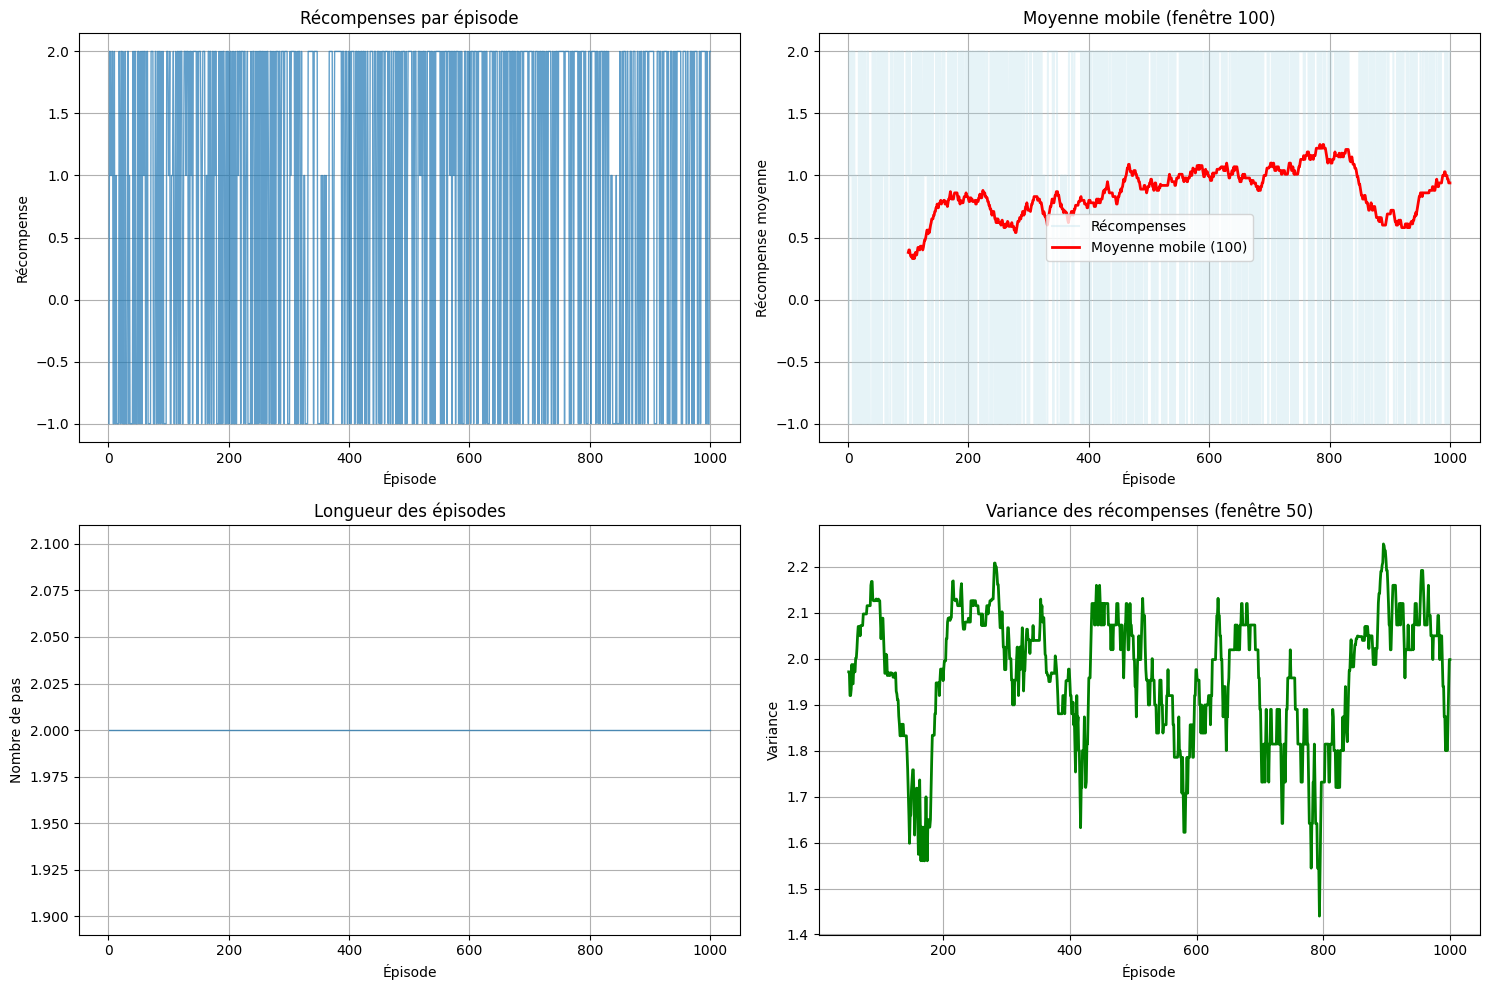

In [42]:
algorithm_ql_hall1.plot_training_curves()

l'algorithme apprend bien le paradoxe de Monty Hall en apprenant que changer de porte est la stratégie optimale

En observant la q-table, on peut remarquer que la stratégie est apprise avec un confiance élevée (0.95 pour changer contre -0.25 pour garder à l'état 2)

✅ Agent créé: Agent_ql_hall1


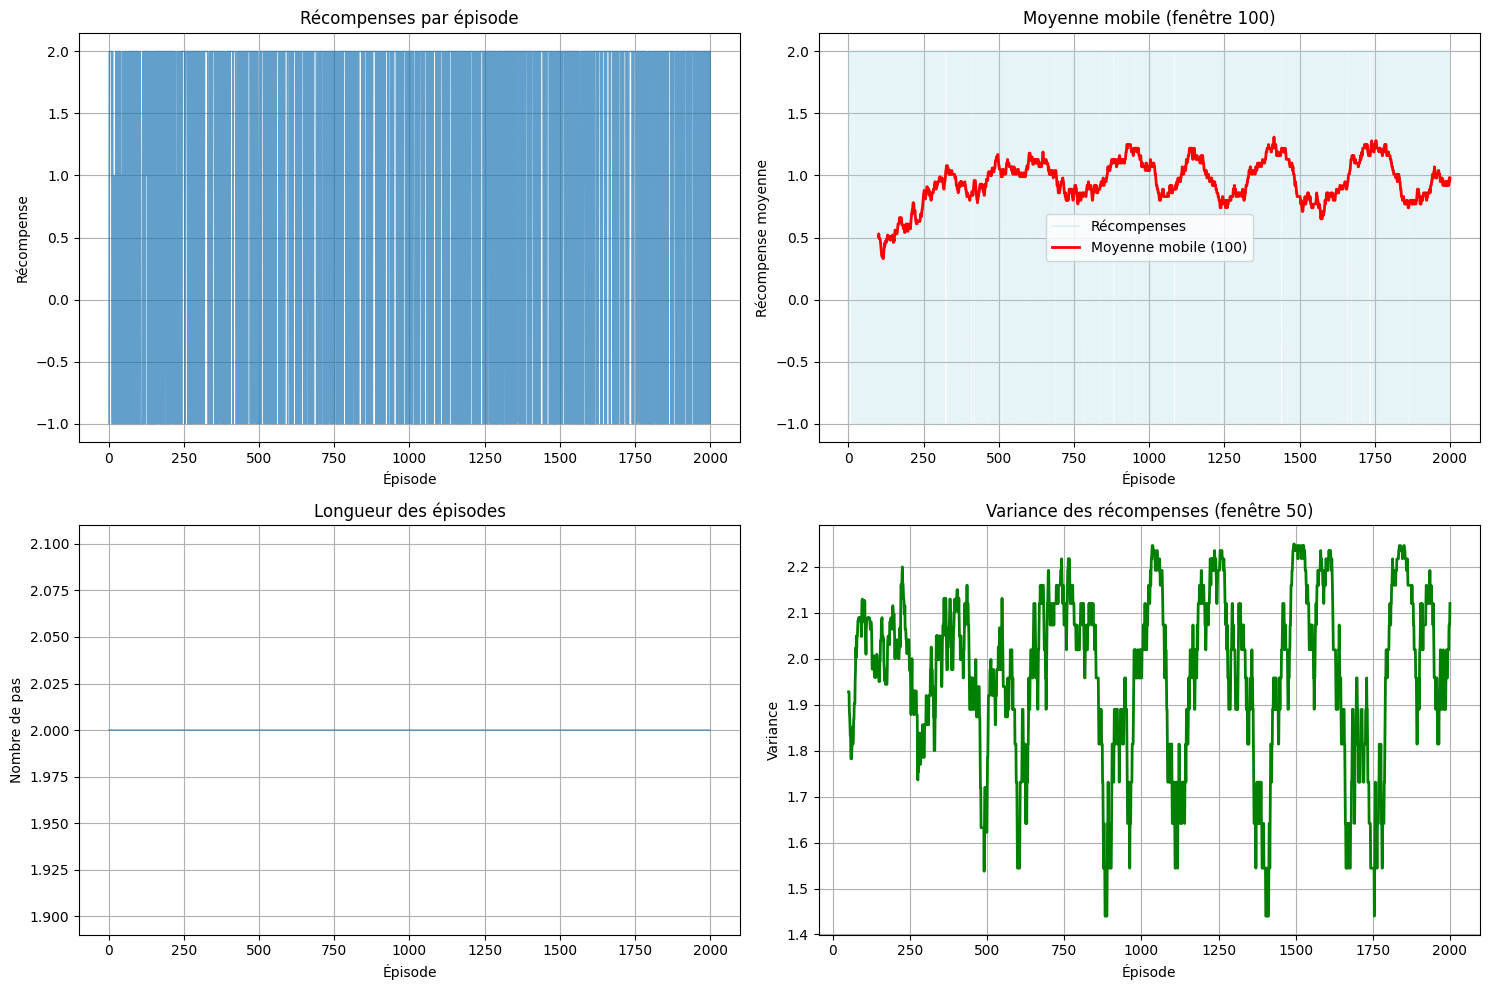

In [44]:
#Meilleure configuration
env_hall1 = MontyHallInteractive()
    
config_ql = {
    'learning_rate': 0.1,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.995
}
    
algorithm_ql_hall1 = QLearning.from_config(config_ql, env_hall1)
algorithm_ql_hall1.train(env_hall1, num_episodes=2000, verbose=False)
    
agent_ql_hall1 = Agent(algorithm_ql_hall1, env_hall1, "Agent_ql_hall1")
algorithm_ql_hall1.plot_training_curves()

In [45]:
c = algorithm_ql_hall1.visualize_q_table()
print(c)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Politique Valeur    
--------------------------------------------------
0     0.48         0.90         0.48         1         0.90      
1     -0.79        0.91         0.00         1         0.91      
2     0.00         0.00         0.00         0         0.00      



✅ Agent créé: Agent_ql_hall1


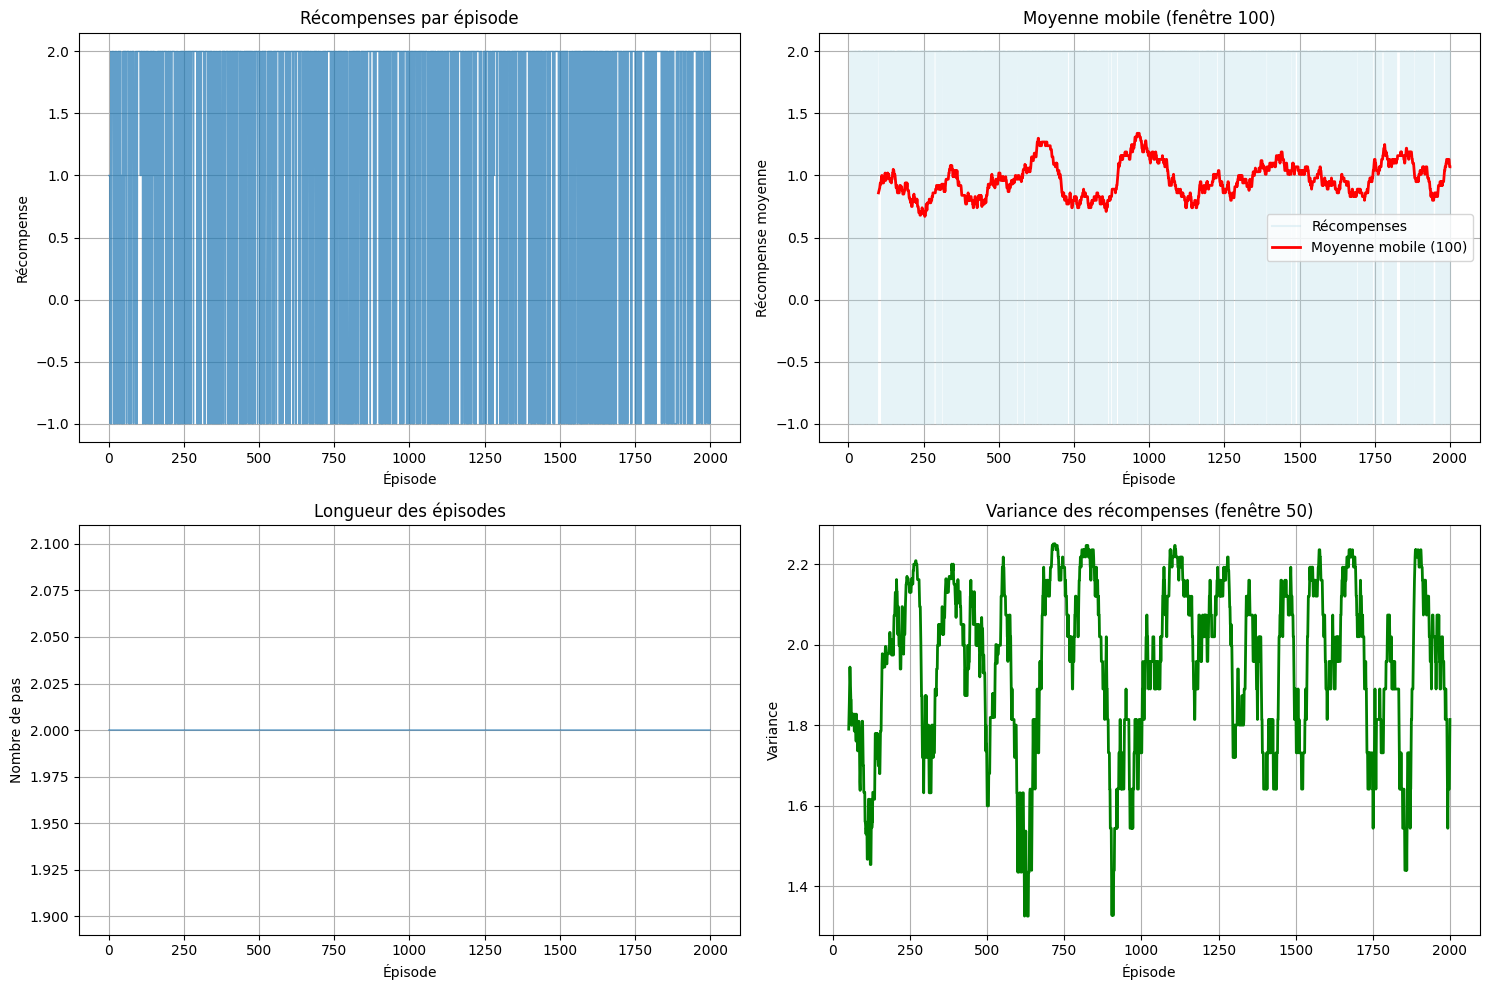

In [46]:
env_hall1 = MontyHallInteractive()
    
config_ql = {
    'learning_rate': 0.1,
    'gamma': 0.95,
    'epsilon': 0.8,
    'epsilon_decay': 0.995
}
    
algorithm_ql_hall1 = QLearning.from_config(config_ql, env_hall1)
algorithm_ql_hall1.train(env_hall1, num_episodes=2000, verbose=False)
    
agent_ql_hall1 = Agent(algorithm_ql_hall1, env_hall1, "Agent_ql_hall1")
algorithm_ql_hall1.plot_training_curves()

In [47]:
c = algorithm_ql_hall1.visualize_q_table()
print(c)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Politique Valeur    
--------------------------------------------------
0     0.44         1.18         0.44         1         1.18      
1     -0.29        1.09         0.00         1         1.09      
2     0.00         0.00         0.00         0         0.00      



L'algo apprend très bien l'environnement et trouve bien la stratégie optimale.
On garde la configuration avec lr = 0.2

### Monty Hall 2 (à finir)

Le bon fichier est monty_hall2

Stratégie optimale : rester sur la même porte jusqu'au choix final

À la fin, garder la porte initiale = 1/5 de chance (20%), changer = 4/5 de chance (80%).

In [14]:
env_hall2 = MontyHall2()
    
config_ql_hall2 = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.995
}
    
algorithm_ql_hall2 = QLearning.from_config(config_ql_hall2, env_hall2)
algorithm_ql_hall2.train(env_hall2, num_episodes=2000, verbose=False)
    
agent_ql_hall2 = Agent(algorithm_ql_hall2, env_hall2, "Agent_ql_hall2")

✅ Agent créé: Agent_ql_hall2


In [17]:
agent_ql_hall2.evaluate_performance(success_criterion = "target_reached", num_episodes=2000)


📊 ÉVALUATION: Agent_ql_hall2
Épisodes d'évaluation: 2000
Progression: 10% - Récompense moyenne: 1.00
Progression: 20% - Récompense moyenne: 1.00
Progression: 30% - Récompense moyenne: 1.00
Progression: 40% - Récompense moyenne: 1.00
Progression: 50% - Récompense moyenne: 1.00
Progression: 60% - Récompense moyenne: 1.00
Progression: 70% - Récompense moyenne: 1.00
Progression: 80% - Récompense moyenne: 1.00
Progression: 90% - Récompense moyenne: 1.00
Progression: 100% - Récompense moyenne: 1.00

✅ RÉSULTATS:
Environnement: MontyHall2
Récompense moyenne: 1.00 ± 0.00
Taux de succès: 0.0% (critère: target_reached)
Longueur moyenne: 4.0 étapes
Temps d'évaluation: 0.05s



{'agent_name': 'Agent_ql_hall2',
 'environment': 'MontyHall2',
 'num_episodes': 2000,
 'avg_reward': np.float64(1.0),
 'std_reward': np.float64(0.0),
 'min_reward': np.float64(1.0),
 'max_reward': np.float64(1.0),
 'avg_episode_length': np.float64(4.0),
 'success_rate': 0.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.048052072525024414,
 'timestamp': '2025-07-19T19:22:46.019733'}

In [16]:
d = algorithm_ql_hall2.visualize_q_table()
print(d)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Action4       Politique Valeur    
--------------------------------------------------
0     0.69         0.55         0.86         0.59         0.61         2         0.86      
1     0.90         0.75         0.00         0.00         0.00         0         0.90      
2     0.55         0.95         0.00         0.00         0.00         1         0.95      
3     1.00         0.01         0.00         0.00         0.00         0         1.00      
4     0.00         0.00         0.00         0.00         0.00         0         0.00      



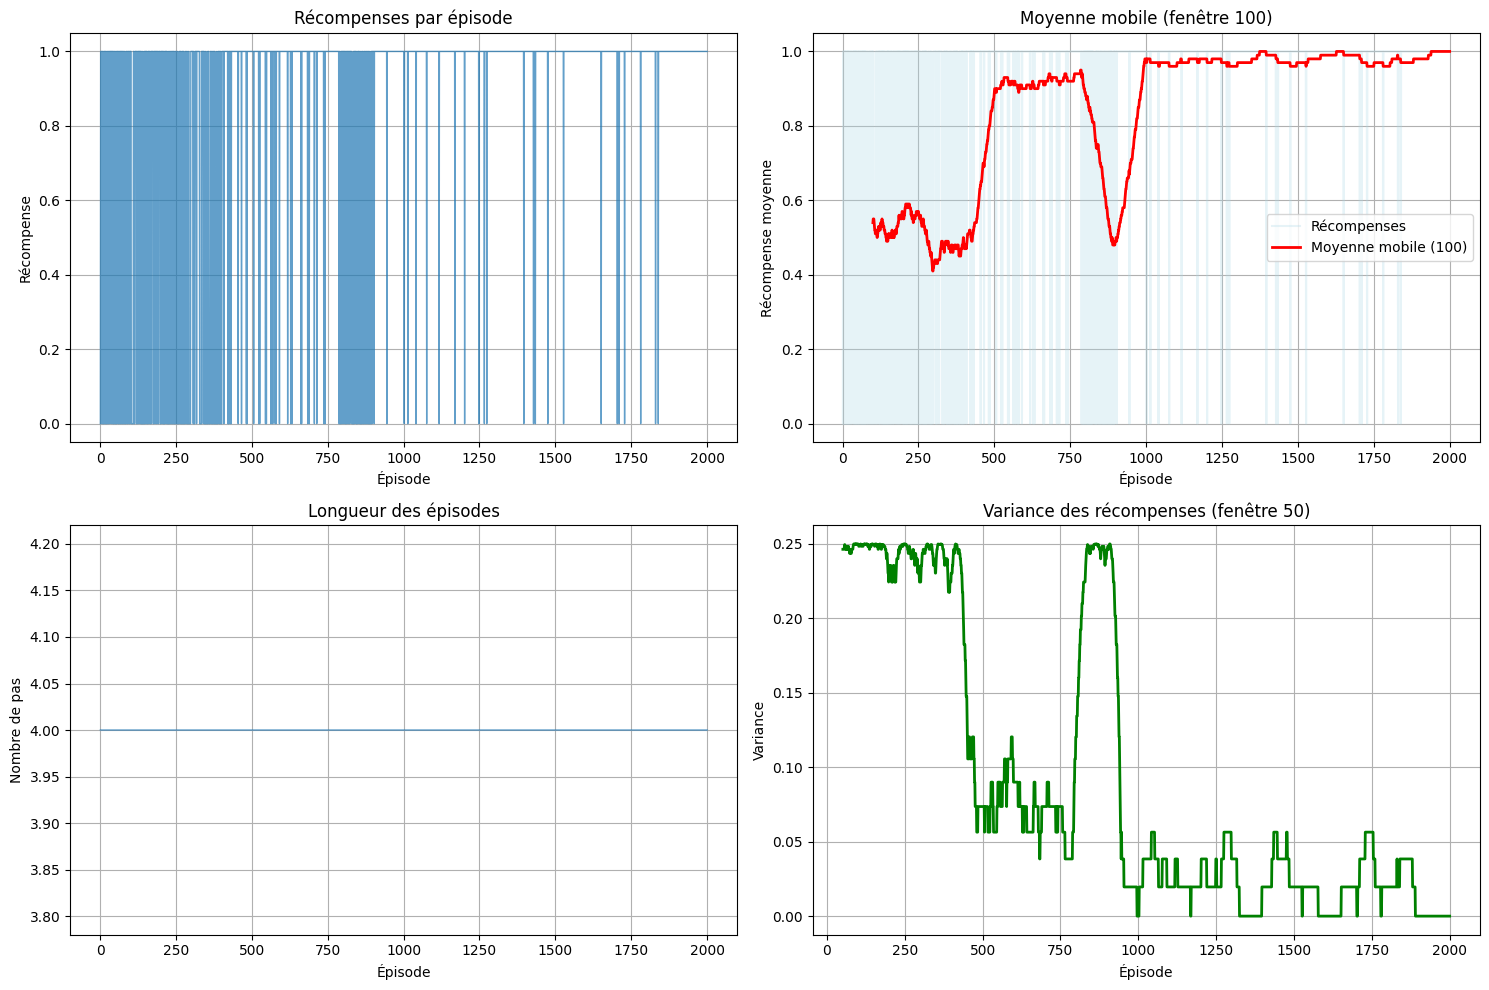

In [18]:
algorithm_ql_hall2.plot_training_curves()

In [19]:
env_hall2 = MontyHall2()
    
config_ql_hall2 = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.99
}
    
algorithm_ql_hall2 = QLearning.from_config(config_ql_hall2, env_hall2)
algorithm_ql_hall2.train(env_hall2, num_episodes=2000, verbose=False)
    
agent_ql_hall2 = Agent(algorithm_ql_hall2, env_hall2, "Agent_ql_hall2")

✅ Agent créé: Agent_ql_hall2


In [20]:
agent_ql_hall2.evaluate_performance(success_criterion = "target_reached", num_episodes=2000)


📊 ÉVALUATION: Agent_ql_hall2
Épisodes d'évaluation: 2000
Progression: 10% - Récompense moyenne: 1.00
Progression: 20% - Récompense moyenne: 1.00
Progression: 30% - Récompense moyenne: 1.00
Progression: 40% - Récompense moyenne: 1.00
Progression: 50% - Récompense moyenne: 1.00
Progression: 60% - Récompense moyenne: 1.00
Progression: 70% - Récompense moyenne: 1.00
Progression: 80% - Récompense moyenne: 1.00
Progression: 90% - Récompense moyenne: 1.00
Progression: 100% - Récompense moyenne: 1.00

✅ RÉSULTATS:
Environnement: MontyHall2
Récompense moyenne: 1.00 ± 0.00
Taux de succès: 0.0% (critère: target_reached)
Longueur moyenne: 4.0 étapes
Temps d'évaluation: 0.05s



{'agent_name': 'Agent_ql_hall2',
 'environment': 'MontyHall2',
 'num_episodes': 2000,
 'avg_reward': np.float64(1.0),
 'std_reward': np.float64(0.0),
 'min_reward': np.float64(1.0),
 'max_reward': np.float64(1.0),
 'avg_episode_length': np.float64(4.0),
 'success_rate': 0.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.04617667198181152,
 'timestamp': '2025-07-19T19:23:44.968756'}

In [21]:
d = algorithm_ql_hall2.visualize_q_table()
print(d)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Action4       Politique Valeur    
--------------------------------------------------
0     0.61         0.47         0.86         0.60         0.69         2         0.86      
1     0.90         0.59         0.00         0.00         0.00         0         0.90      
2     0.95         0.76         0.00         0.00         0.00         0         0.95      
3     0.00         1.00         0.00         0.00         0.00         1         1.00      
4     0.00         0.00         0.00         0.00         0.00         0         0.00      



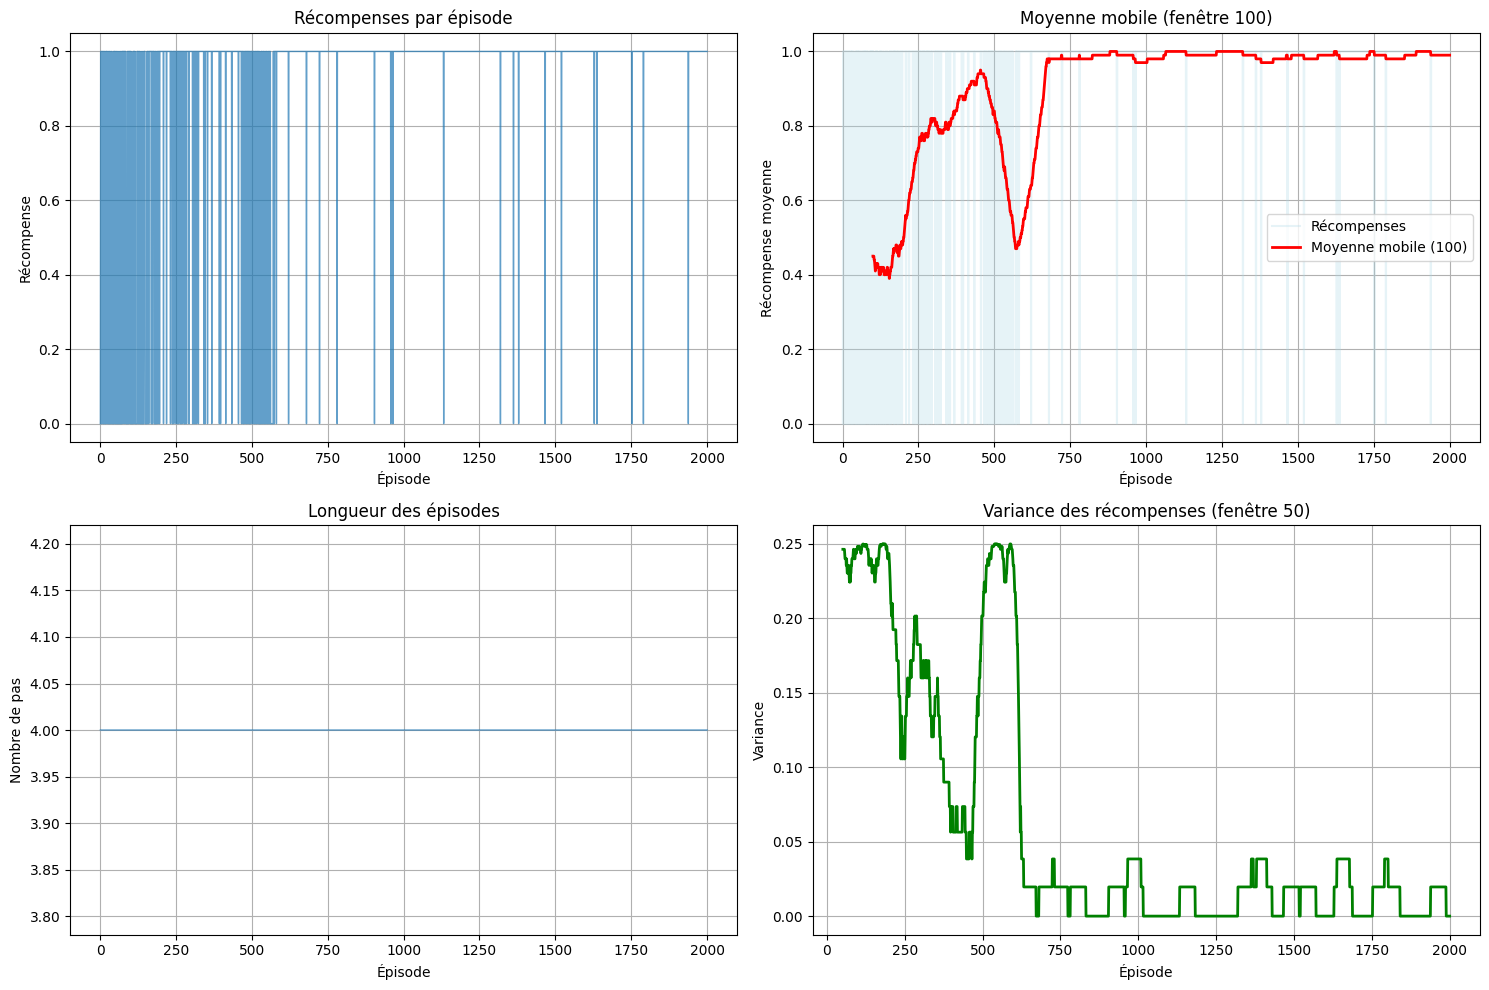

In [22]:
algorithm_ql_hall2.plot_training_curves()

In [59]:
env_hall2 = MontyHall2()
    
config_ql_hall2 = {
    'learning_rate': 0.2,
    'gamma': 0.99,
    'epsilon': 1,
    'epsilon_decay': 0.995
}
    
algorithm_ql_hall2 = QLearning.from_config(config_ql_hall2, env_hall2)
algorithm_ql_hall2.train(env_hall2, num_episodes=3000, verbose=False)
    
agent_ql_hall2 = Agent(algorithm_ql_hall2, env_hall2, "Agent_ql_hall2")

✅ Agent créé: Agent_ql_hall2


In [60]:
agent_ql_hall2.evaluate_performance(success_criterion = "target_reached", num_episodes=3000)


📊 ÉVALUATION: Agent_ql_hall2
Épisodes d'évaluation: 3000
Progression: 10% - Récompense moyenne: 1.00
Progression: 20% - Récompense moyenne: 1.00
Progression: 30% - Récompense moyenne: 1.00
Progression: 40% - Récompense moyenne: 1.00
Progression: 50% - Récompense moyenne: 1.00
Progression: 60% - Récompense moyenne: 1.00
Progression: 70% - Récompense moyenne: 1.00
Progression: 80% - Récompense moyenne: 1.00
Progression: 90% - Récompense moyenne: 1.00
Progression: 100% - Récompense moyenne: 1.00

✅ RÉSULTATS:
Environnement: MontyHall2
Récompense moyenne: 1.00 ± 0.00
Taux de succès: 0.0% (critère: target_reached)
Longueur moyenne: 4.0 étapes
Temps d'évaluation: 0.05s



{'agent_name': 'Agent_ql_hall2',
 'environment': 'MontyHall2',
 'num_episodes': 3000,
 'avg_reward': np.float64(1.0),
 'std_reward': np.float64(0.0),
 'min_reward': np.float64(1.0),
 'max_reward': np.float64(1.0),
 'avg_episode_length': np.float64(4.0),
 'success_rate': 0.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.04541921615600586,
 'timestamp': '2025-07-19T19:41:26.088734'}

In [61]:
d = algorithm_ql_hall2.visualize_q_table()
print(d)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Action4       Politique Valeur    
--------------------------------------------------
0     0.60         0.51         0.78         0.51         0.97         4         0.97      
1     0.98         0.70         0.00         0.00         0.00         0         0.98      
2     0.99         0.66         0.00         0.00         0.00         0         0.99      
3     0.01         1.00         0.00         0.00         0.00         1         1.00      
4     0.00         0.00         0.00         0.00         0.00         0         0.00      



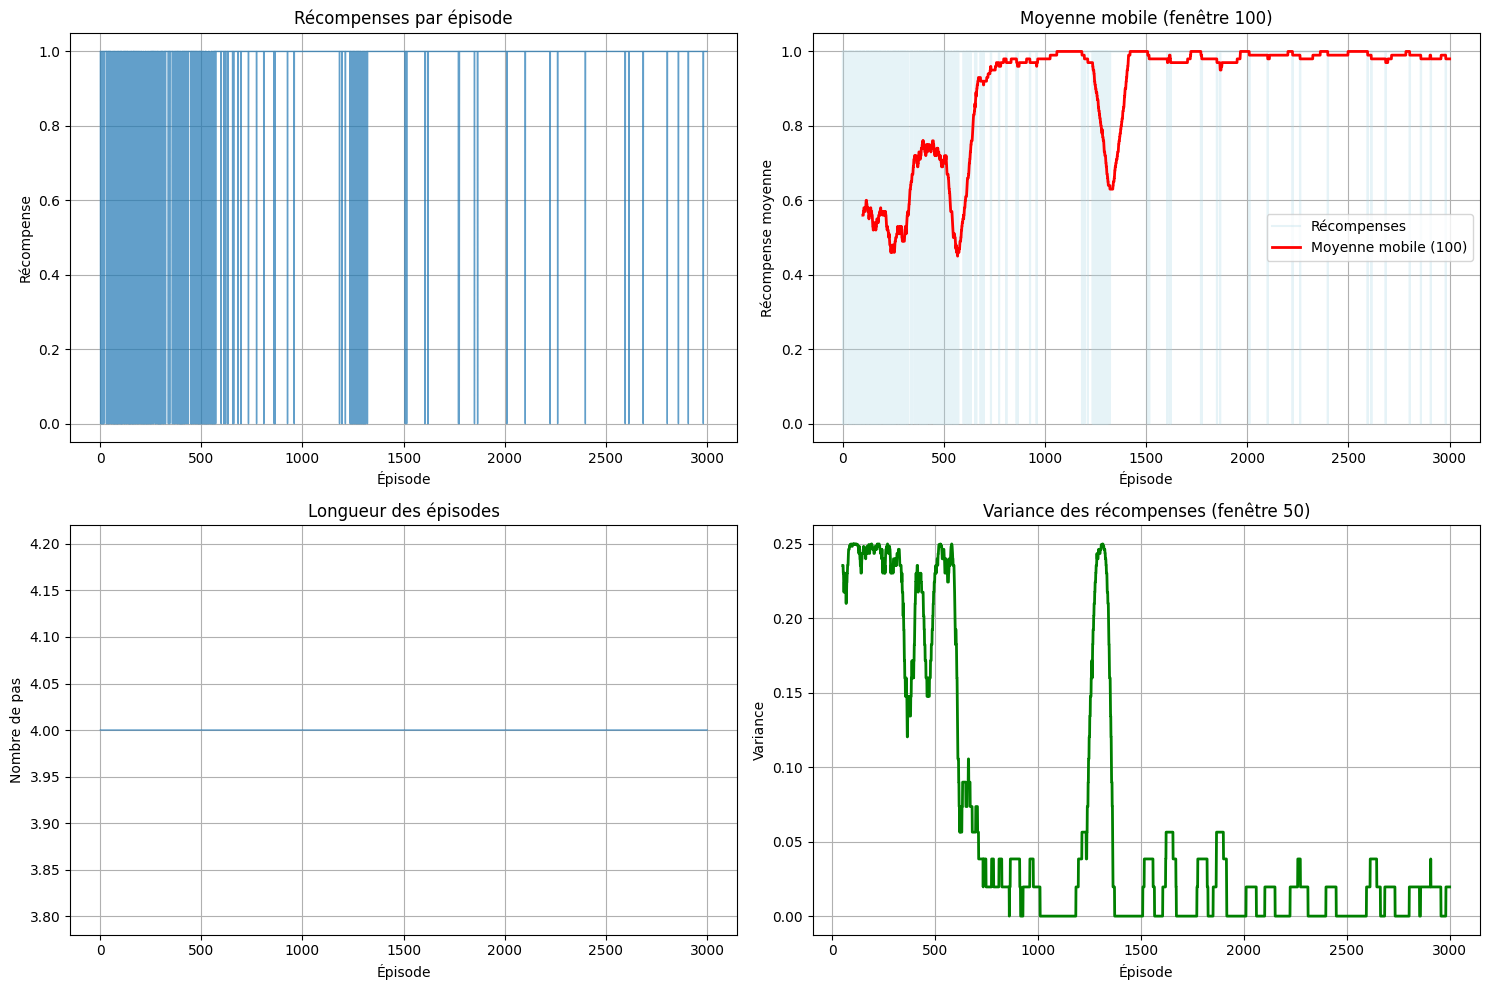

In [58]:
algorithm_ql_hall2.plot_training_curves()

In [5]:
env_hall2 = MontyHall2()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1
}
    
algorithm_ql_hall2 = QLearning.from_config(config_ql, env_hall2)
algorithm_ql_hall2.train(env_hall2, num_episodes=1000, verbose=False)
    
agent_ql_hall2 = Agent(algorithm_ql_hall2, env_hall2, "Agent_ql_hall2")

✅ Agent créé: Agent_ql_hall2


In [6]:
agent_ql_hall2.evaluate_performance(success_criterion = "target_reached", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_hall2
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 0.79
Progression: 20% - Récompense moyenne: 0.80
Progression: 30% - Récompense moyenne: 0.81
Progression: 40% - Récompense moyenne: 0.81
Progression: 50% - Récompense moyenne: 0.81
Progression: 60% - Récompense moyenne: 0.79
Progression: 70% - Récompense moyenne: 0.79
Progression: 80% - Récompense moyenne: 0.78
Progression: 90% - Récompense moyenne: 0.80
Progression: 100% - Récompense moyenne: 0.80

✅ RÉSULTATS:
Environnement: MontyHall2
Récompense moyenne: 0.80 ± 0.40
Taux de succès: 0.0% (critère: target_reached)
Longueur moyenne: 4.0 étapes
Temps d'évaluation: 0.04s



{'agent_name': 'Agent_ql_hall2',
 'environment': 'MontyHall2',
 'num_episodes': 1000,
 'avg_reward': np.float64(0.798),
 'std_reward': np.float64(0.4014922166119787),
 'min_reward': np.float64(0.0),
 'max_reward': np.float64(1.0),
 'avg_episode_length': np.float64(4.0),
 'success_rate': 0.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.040061235427856445,
 'timestamp': '2025-07-18T20:04:47.681082'}

In [7]:
d = algorithm_ql_hall2.visualize_q_table()
print(d)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Action4       Politique Valeur    
--------------------------------------------------
0     0.52         0.70         0.56         0.53         0.54         1         0.70      
1     0.73         0.56         0.54         0.54         0.55         0         0.73      
2     0.50         0.49         0.48         0.49         0.80         4         0.80      
3     0.12         0.26         0.20         0.73         0.25         3         0.73      
4     0.00         0.00         0.00         0.00         0.00         0         0.00      



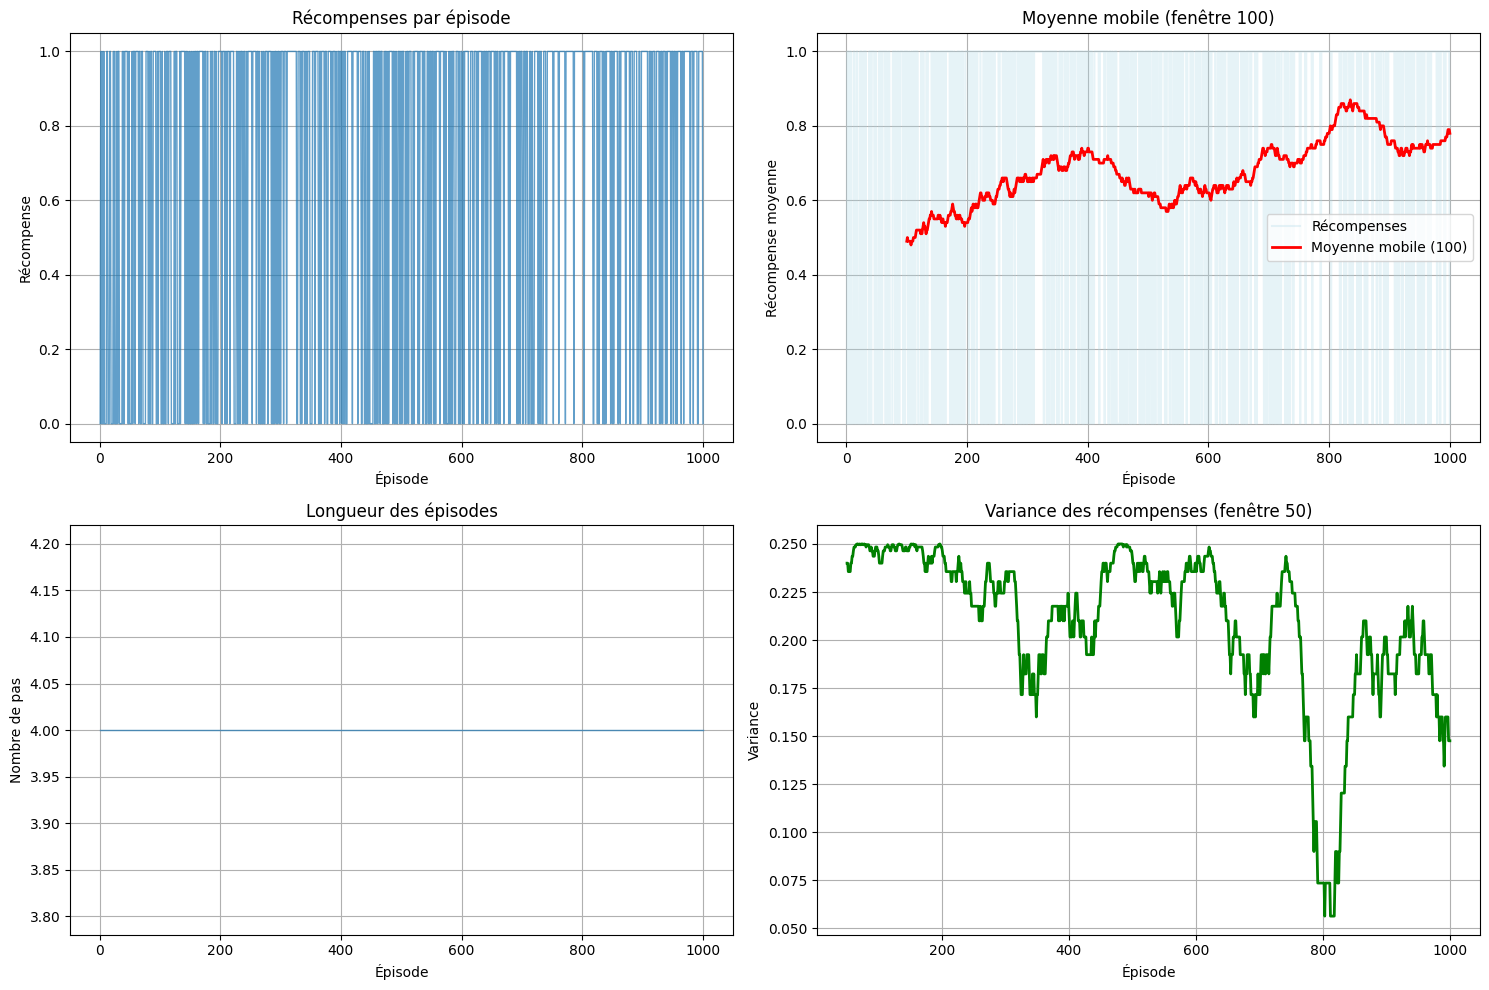

In [8]:
algorithm_ql_hall2.plot_training_curves()

Augmentatons le nombre d'épisodes d'exploration (débute à 459 ep)

In [30]:
#Meilleure conf
env_hall2 = MontyHall2()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.99
}
    
algorithm_ql_hall2 = QLearning.from_config(config_ql, env_hall2)
algorithm_ql_hall2.train(env_hall2, num_episodes=1000, verbose=False)
    
agent_ql_hall2 = Agent(algorithm_ql_hall2, env_hall2, "Agent_ql_hall2")

✅ Agent créé: Agent_ql_hall2


In [31]:
agent_ql_hall2.evaluate_performance(success_criterion = "target_reached", num_episodes=1000)


📊 ÉVALUATION: Agent_ql_hall2
Épisodes d'évaluation: 1000
Progression: 10% - Récompense moyenne: 0.70
Progression: 20% - Récompense moyenne: 0.76
Progression: 30% - Récompense moyenne: 0.73
Progression: 40% - Récompense moyenne: 0.72
Progression: 50% - Récompense moyenne: 0.73
Progression: 60% - Récompense moyenne: 0.73
Progression: 70% - Récompense moyenne: 0.72
Progression: 80% - Récompense moyenne: 0.73
Progression: 90% - Récompense moyenne: 0.73
Progression: 100% - Récompense moyenne: 0.74

✅ RÉSULTATS:
Environnement: MontyHall2
Récompense moyenne: 0.74 ± 0.44
Taux de succès: 0.0% (critère: target_reached)
Longueur moyenne: 4.0 étapes
Temps d'évaluation: 0.02s



{'agent_name': 'Agent_ql_hall2',
 'environment': 'MontyHall2',
 'num_episodes': 1000,
 'avg_reward': np.float64(0.741),
 'std_reward': np.float64(0.43808560807221225),
 'min_reward': np.float64(0.0),
 'max_reward': np.float64(1.0),
 'avg_episode_length': np.float64(4.0),
 'success_rate': 0.0,
 'success_criterion': 'target_reached',
 'evaluation_time': 0.02396416664123535,
 'timestamp': '2025-07-18T20:32:33.698001'}

In [32]:
d = algorithm_ql_hall2.visualize_q_table()
print(d)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Action4       Politique Valeur    
--------------------------------------------------
0     0.64         0.57         0.59         0.62         0.61         0         0.64      
1     0.62         0.62         0.60         0.60         0.62         1         0.62      
2     0.59         0.56         0.61         0.58         0.64         4         0.64      
3     0.06         0.44         0.28         0.81         0.19         3         0.81      
4     0.00         0.00         0.00         0.00         0.00         0         0.00      



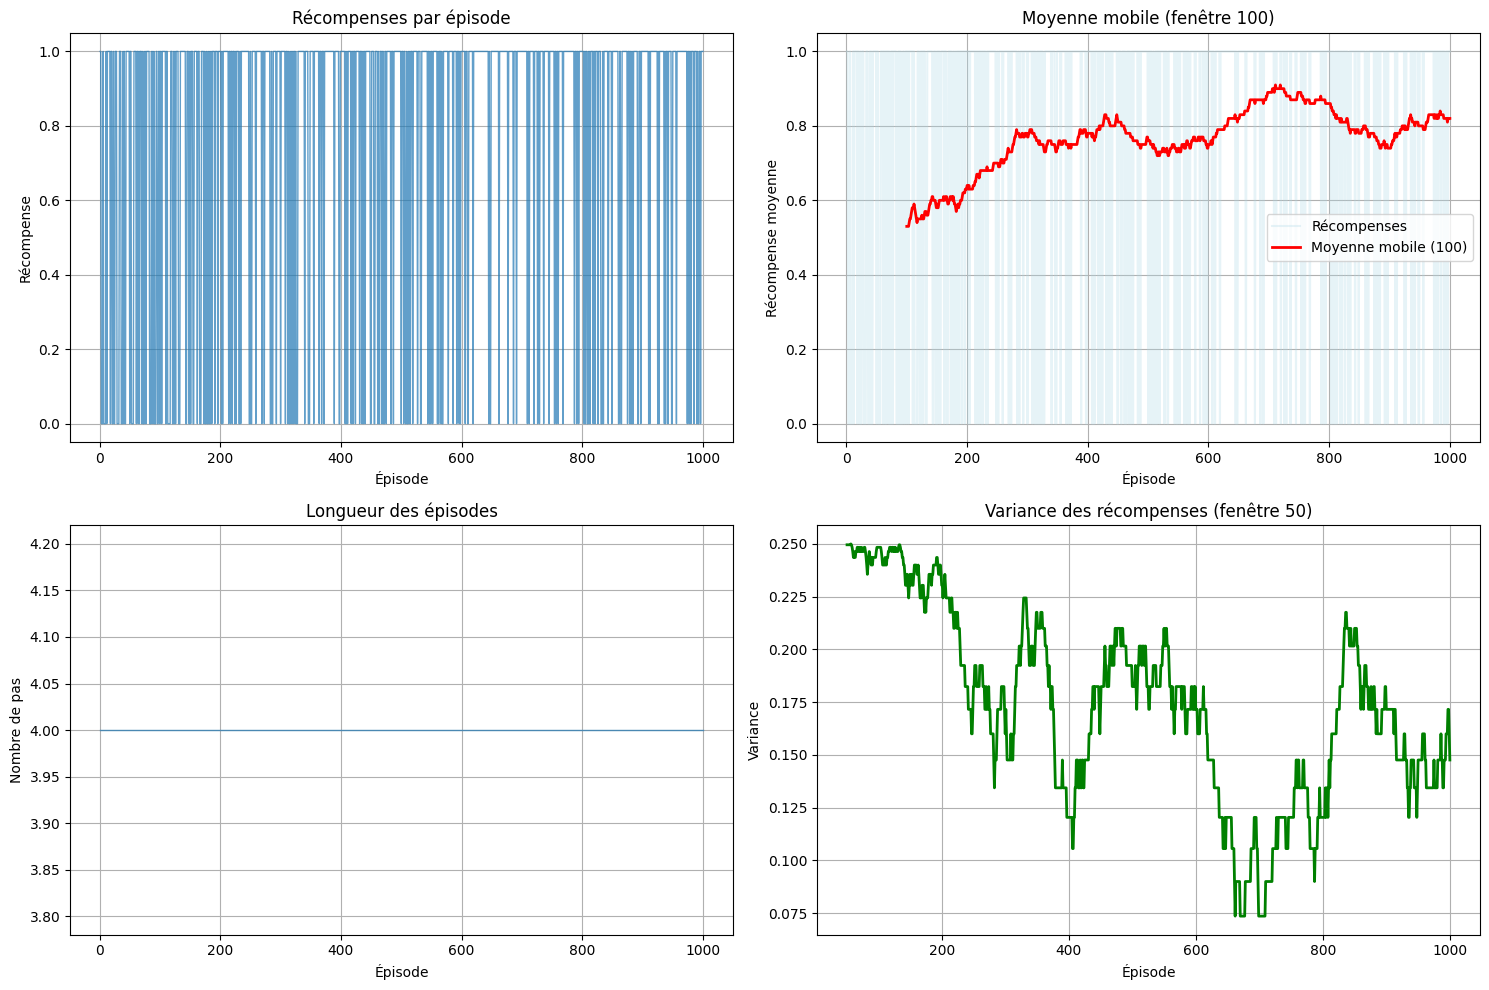

In [33]:
algorithm_ql_hall2.plot_training_curves()

Après lancement et analyse des autres cellules, cette configuration reste la meilleure car respecte le politique optimale (toujours changer à chaque étape), converge rapidement vers 0.8 et se stabilise avec une très faible variance 

In [22]:
env_hall2 = MontyHall2()
    
config_ql = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1
}
    
algorithm_ql_hall2 = QLearning.from_config(config_ql, env_hall2)
algorithm_ql_hall2.train(env_hall2, num_episodes=3000, verbose=False)
    
agent_ql_hall2 = Agent(algorithm_ql_hall2, env_hall2, "Agent_ql_hall2")

✅ Agent créé: Agent_ql_hall2


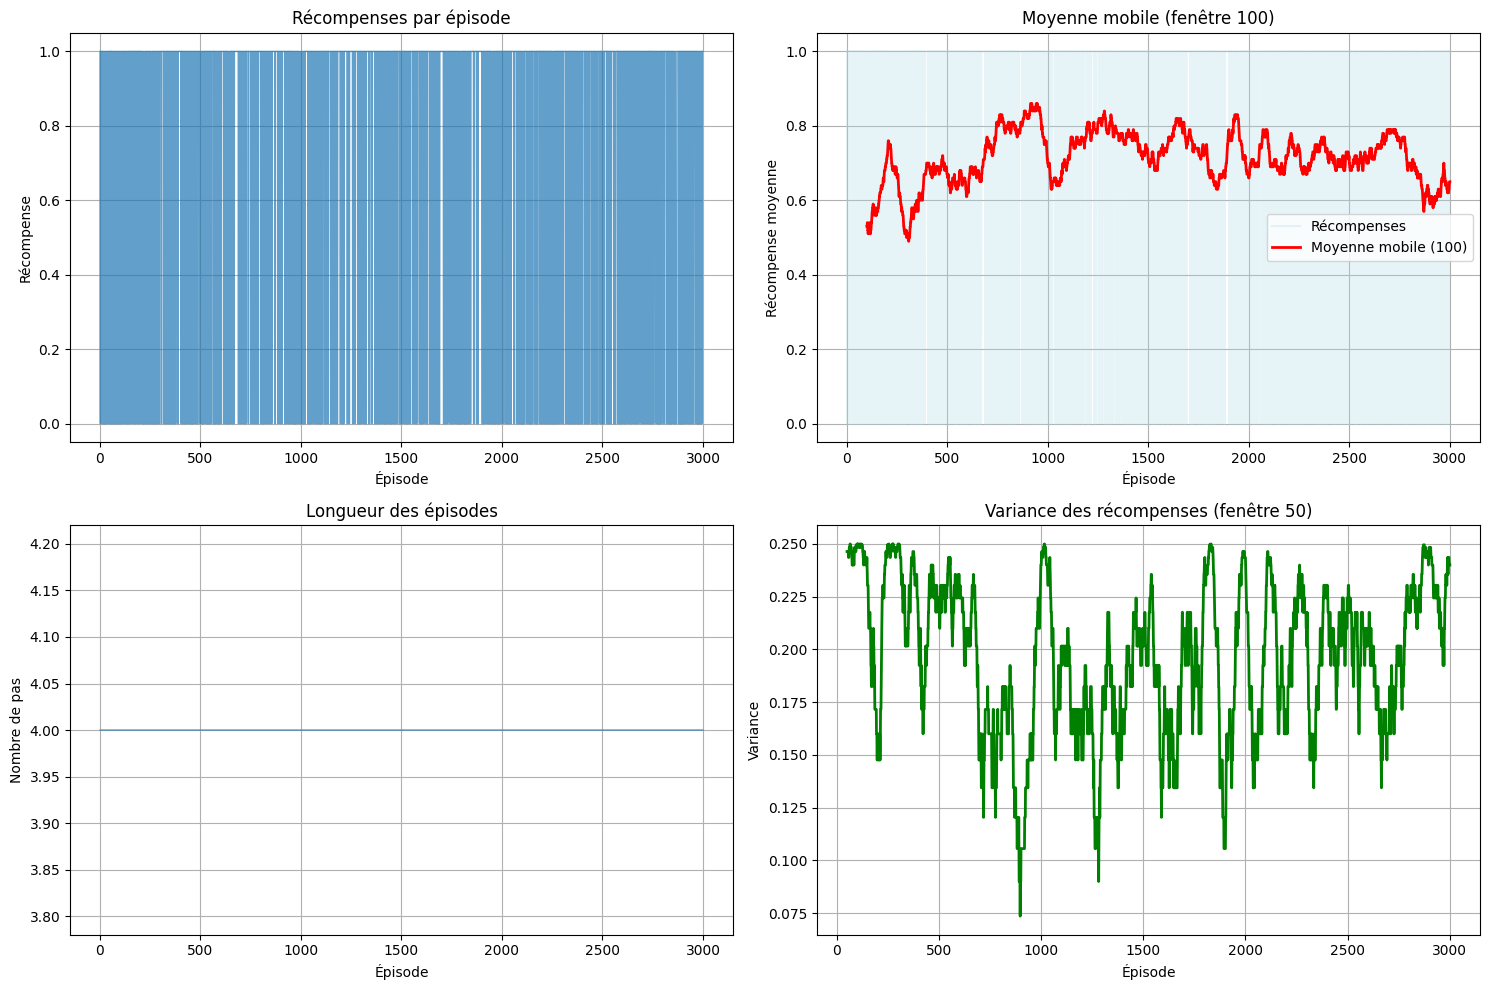

In [23]:
algorithm_ql_hall2.plot_training_curves()

In [24]:
d = algorithm_ql_hall2.visualize_q_table()
print(d)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Action4       Politique Valeur    
--------------------------------------------------
0     0.46         0.46         0.46         0.46         0.46         2         0.46      
1     0.47         0.45         0.45         0.45         0.45         0         0.47      
2     0.41         0.41         0.38         0.59         0.41         3         0.59      
3     0.08         0.20         0.18         0.84         0.04         3         0.84      
4     0.00         0.00         0.00         0.00         0.00         0         0.00      



Il semble n'y avoir aucune stratégie optimale

✅ Agent créé: Agent_ql_hall2


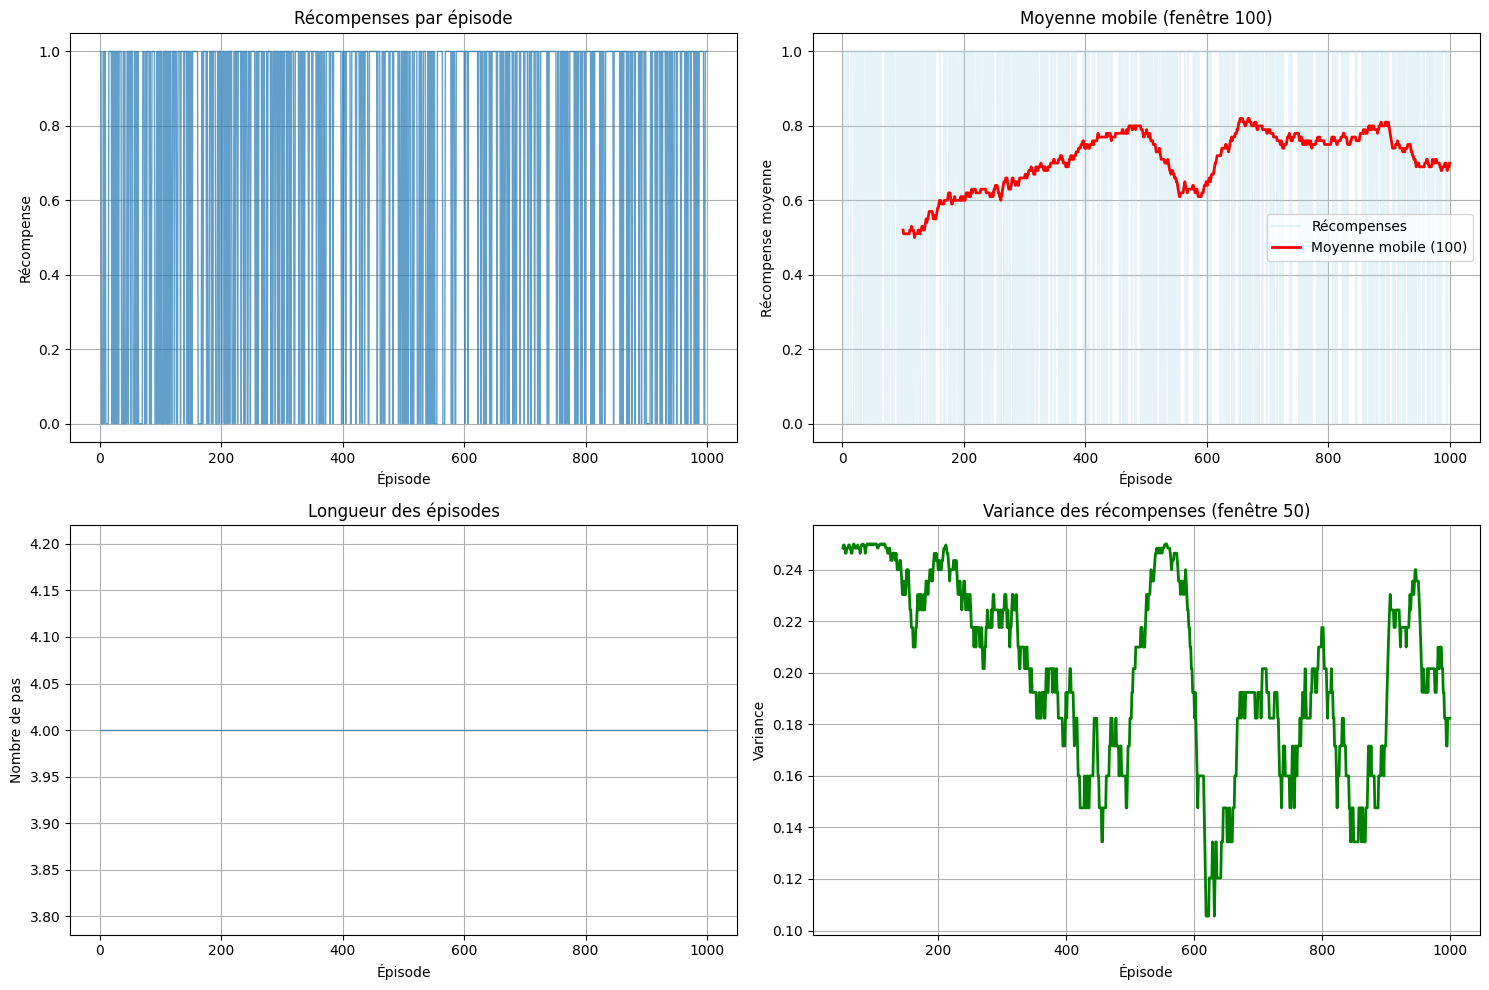

In [25]:
env_hall2 = MontyHall2()
    
config_ql = {
    'learning_rate': 0.3,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.99
}
    
algorithm_ql_hall2 = QLearning.from_config(config_ql, env_hall2)
algorithm_ql_hall2.train(env_hall2, num_episodes=1000, verbose=False)
    
agent_ql_hall2 = Agent(algorithm_ql_hall2, env_hall2, "Agent_ql_hall2")
algorithm_ql_hall2.plot_training_curves()

In [26]:
d = algorithm_ql_hall2.visualize_q_table()
print(d)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Action4       Politique Valeur    
--------------------------------------------------
0     0.52         0.48         0.52         0.54         0.66         4         0.66      
1     0.50         0.50         0.47         0.59         0.67         4         0.67      
2     0.71         0.55         0.39         0.49         0.38         0         0.71      
3     0.05         0.16         0.13         0.87         0.11         3         0.87      
4     0.00         0.00         0.00         0.00         0.00         0         0.00      



lr est trop grand à 0.3. Pas de strat opt

✅ Agent créé: Agent_ql_hall2


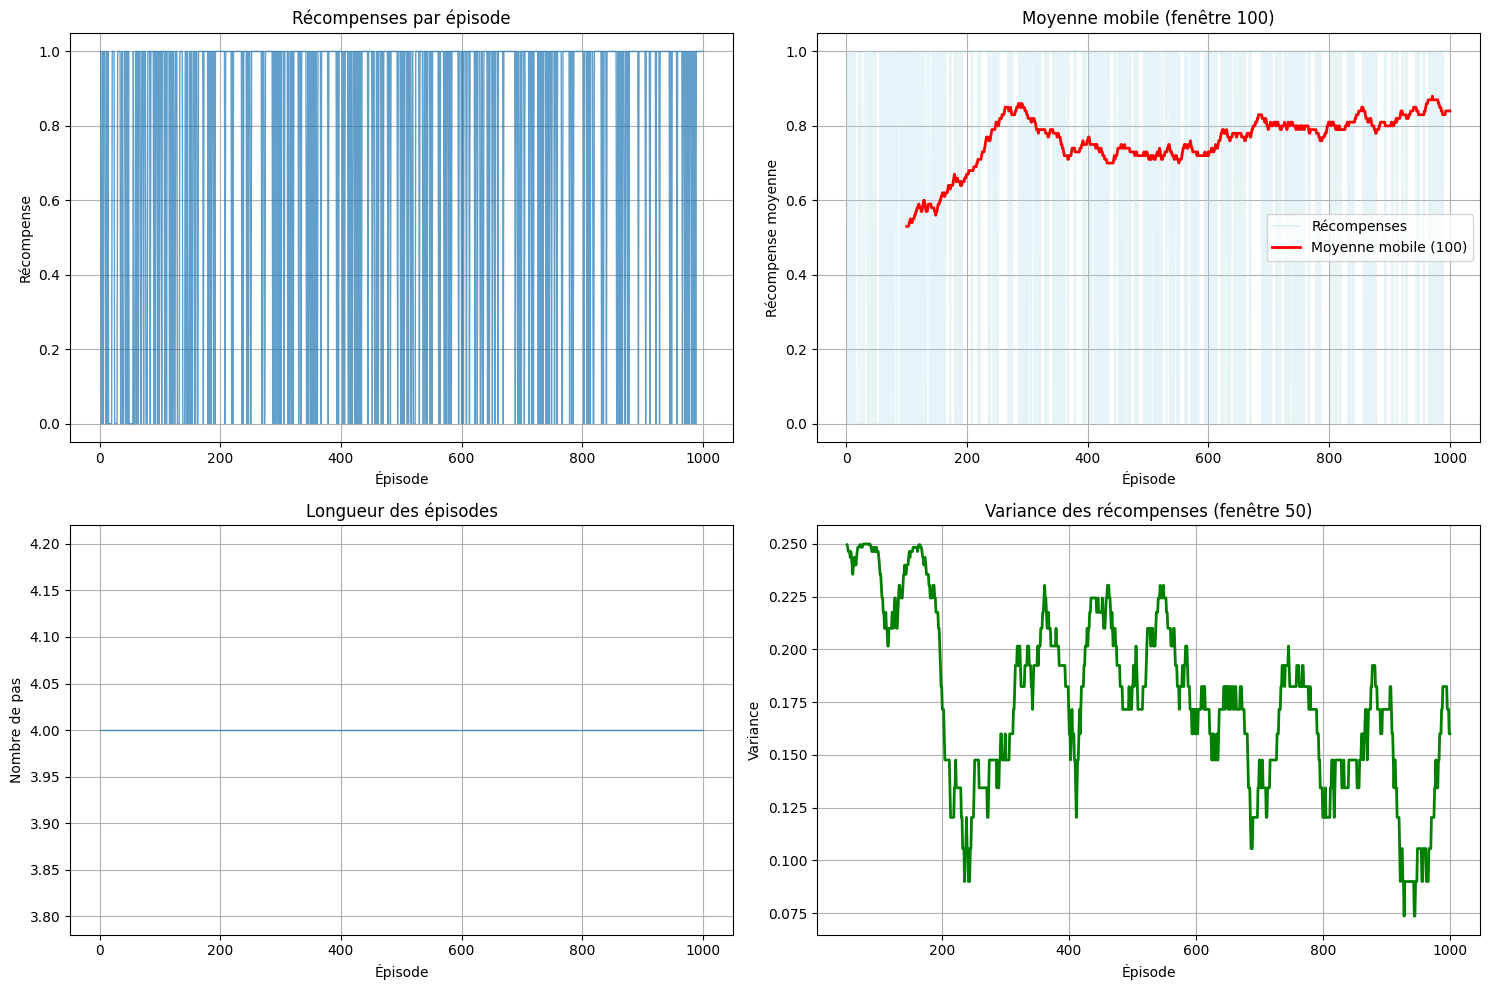

In [28]:
env_hall2 = MontyHall2()
    
config_ql = {
    'learning_rate': 0.1,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.99
}
    
algorithm_ql_hall2 = QLearning.from_config(config_ql, env_hall2)
algorithm_ql_hall2.train(env_hall2, num_episodes=1000, verbose=False)
    
agent_ql_hall2 = Agent(algorithm_ql_hall2, env_hall2, "Agent_ql_hall2")
algorithm_ql_hall2.plot_training_curves()

In [29]:
d = algorithm_ql_hall2.visualize_q_table()
print(d)


Q-TABLE - QLearning
État  Action0       Action1       Action2       Action3       Action4       Politique Valeur    
--------------------------------------------------
0     0.45         0.49         0.71         0.41         0.31         2         0.71      
1     0.54         0.57         0.72         0.52         0.50         2         0.72      
2     0.65         0.60         0.76         0.61         0.62         2         0.76      
3     0.40         0.54         0.16         0.90         0.19         3         0.90      
4     0.00         0.00         0.00         0.00         0.00         0         0.00      



In [ ]:
save_model(filepath: str)

80% de réussite : Excellent ! optimal théorique pour 5 portes
Convergence stable : La moyenne mobile se stabilise autour de 0.8
Variance décroissante : L'agent devient plus consistant

### Conclusion Q learning
Dans les environnements simples, Q-learning fonctionne presque toujours bien. Les hyperparamètres agissent surtout sur la vitesse et la qualité de convergence.

## Meilleures config

### Line world

In [65]:
# meilleure config
env_lineworld = LineWorld()
    
config_ql_line_m = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 0.3,
    'epsilon_decay': 0.9
}
    
algorithm_ql_line_m = QLearning.from_config(config_ql_line_m, env_lineworld)
algorithm_ql_line_m.train(env_lineworld, num_episodes=1000, verbose=False)
    
agent_ql_line_m = Agent(algorithm_ql_line_m, env_lineworld, "Meilleur agent_ql_line")

### Grid world

In [66]:
env_gridworld = GridWorld()
    
config_ql_grid_m = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1
}
    
algorithm_ql_grid_m = QLearning.from_config(config_ql_grid_m, env_gridworld)
algorithm_ql_grid_m.train(env_gridworld, num_episodes=1000, verbose=False)
    
agent_ql_grid_m = Agent(algorithm_ql_grid_m, env_gridworld, "Meilleur agent_ql_grid")

### Two round RPS

In [67]:
#Meilleure configuration (après analyse)
env_rps = TwoRoundRPSEnvironment()
    
config_ql_rps_m = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.99
}
    
algorithm_ql_rps_m = QLearning.from_config(config_ql_rps_m, env_rps)
algorithm_ql_rps_m.train(env_rps, num_episodes=1000, verbose=False)
    
agent_ql_rps_m = Agent(algorithm_ql_rps_m, env_rps, "Meilleur agent_ql_rps")

### Monty hall 1

In [68]:
#Meilleure configuration
env_hall1 = MontyHallInteractive()
    
config_ql_hall_m = {
    'learning_rate': 0.1,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.995
}
    
algorithm_ql_hall1_m = QLearning.from_config(config_ql_hall_m, env_hall1)
algorithm_ql_hall1_m.train(env_hall1, num_episodes=2000, verbose=False)
    
agent_ql_hall1_m = Agent(algorithm_ql_hall1_m, env_hall1, "Meilleur agent_ql_hall1")

### Monty hall 2

In [10]:
#Meilleure conf
env_hall2 = MontyHall2()
    
config_ql_hall2_m = {
    'learning_rate': 0.2,
    'gamma': 0.95,
    'epsilon': 1,
    'epsilon_decay': 0.99
}
    
algorithm_ql_hall2_m = QLearning.from_config(config_ql_hall2_m, env_hall2)
algorithm_ql_hall2_m.train(env_hall2, num_episodes=1000, verbose=False)
    
agent_ql_hall2_m = Agent(algorithm_ql_hall2_m, env_hall2, "Meilleur agent_ql_hall2")

✅ Agent créé: Meilleur agent_ql_hall2


## Démonstration pas à pas

In [5]:
agent_ql_line_m.demonstrate_step_by_step(num_episodes = 1)


🎬 DÉMONSTRATION PAS-À-PAS: Meilleur agent_ql_line

🎯 Épisode 1/1
État initial: 2

=== LineWorld (Step 0) ===
Pos:  0  1  2  3  4 
     (-) . [A] . (+)
Agent en position: 2
Récompense totale: 0.0
Actions: [0] Left ← | [1] Right →
Q-values état 2: [0.1550134 0.95     ]
Meilleure action: 1 (Q=0.950)

⏯️ Étape 1:
Action choisie: 1
État: 2 → 3
Récompense: 0.0 | Total: 0.00

=== LineWorld (Step 1) ===
Pos:  0  1  2  3  4 
     (-) .  . [A](+)
Agent en position: 3
Récompense totale: 0.0
Actions: [0] Left ← | [1] Right →
Q-values état 3: [0.8055948 1.       ]
Meilleure action: 1 (Q=1.000)

⏯️ Étape 2:
Action choisie: 1
État: 3 → 4
Récompense: 1.0 | Total: 1.00

=== LineWorld (Step 2) ===
Pos:  0  1  2  3  4 
     (-) .  .  . [A]
Agent en position: 4
Récompense totale: 1.0
État terminal - Aucune action possible
Q-values état 4: [0. 0.]
Meilleure action: 0 (Q=0.000)
🎉 SUCCÈS - Cible atteinte!

📋 Résumé épisode 1:
Récompense totale: 1.00
Nombre d'étapes: 2
Succès: ✅


[{'episode': 1,
  'steps': [{'step': 1,
    'state': 2,
    'action': np.int64(1),
    'reward': 0.0,
    'next_state': 3,
    'done': False},
   {'step': 2,
    'state': 3,
    'action': np.int64(1),
    'reward': 1.0,
    'next_state': 4,
    'done': True}],
  'total_reward': 1.0,
  'success': True}]

In [70]:
# Rediriger stdout vers un buffer
old_stdout = sys.stdout
buffer = io.StringIO()
sys.stdout = buffer

# Appeler ta fonction de démonstration
agent_ql_line_m.demonstrate_step_by_step(num_episodes = 1)

# Restaurer stdout
sys.stdout = old_stdout

# Écrire dans un fichier
with open("demo_pas_a_pas/line_world/demo_q_learning.txt", "w", encoding="utf-8") as f:
    f.write(buffer.getvalue())


In [20]:
agent_ql_grid_m.demonstrate_step_by_step(num_episodes = 1)


🎬 DÉMONSTRATION PAS-À-PAS: Meilleur agent_ql_grid

🎯 Épisode 1/1
État initial: 0
A . . . .
. . . . .
. . . . .
. . . . .
. . . . G
Position agent: (0, 0)
Q-values état 0: [0.         0.95011888 0.         0.95011367]
Meilleure action: 1 (Q=0.950)

⏯️ Étape 1:
Action choisie: 1
État: 0 → 5
Récompense: -1.0 | Total: -1.00
. . . . .
A . . . .
. . . . .
. . . . .
. . . . G
Position agent: (0, 1)
Q-values état 5: [-0.09740358  2.05275672  0.          2.05275533]
Meilleure action: 1 (Q=2.053)

⏯️ Étape 2:
Action choisie: 1
État: 5 → 10
Récompense: -1.0 | Total: -2.00
. . . . .
. . . . .
A . . . .
. . . . .
. . . . G
Position agent: (0, 2)
Q-values état 10: [0.94646964 3.21342812 0.         3.21338602]
Meilleure action: 1 (Q=3.213)

⏯️ Étape 3:
Action choisie: 1
État: 10 → 15
Récompense: -1.0 | Total: -3.00
. . . . .
. . . . .
. . . . .
A . . . .
. . . . G
Position agent: (0, 3)
Q-values état 15: [2.05274712 4.43515796 0.         4.4351875 ]
Meilleure action: 3 (Q=4.435)

⏯️ Étape 4:
Action 

[{'episode': 1,
  'steps': [{'step': 1,
    'state': 0,
    'action': np.int64(1),
    'reward': -1.0,
    'next_state': 5,
    'done': False},
   {'step': 2,
    'state': 5,
    'action': np.int64(1),
    'reward': -1.0,
    'next_state': 10,
    'done': False},
   {'step': 3,
    'state': 10,
    'action': np.int64(1),
    'reward': -1.0,
    'next_state': 15,
    'done': False},
   {'step': 4,
    'state': 15,
    'action': np.int64(3),
    'reward': -1.0,
    'next_state': 16,
    'done': False},
   {'step': 5,
    'state': 16,
    'action': np.int64(1),
    'reward': -1.0,
    'next_state': 21,
    'done': False},
   {'step': 6,
    'state': 21,
    'action': np.int64(3),
    'reward': -1.0,
    'next_state': 22,
    'done': False},
   {'step': 7,
    'state': 22,
    'action': np.int64(3),
    'reward': -1.0,
    'next_state': 23,
    'done': False},
   {'step': 8,
    'state': 23,
    'action': np.int64(3),
    'reward': 10.0,
    'next_state': 24,
    'done': True}],
  'total_r

In [71]:
# Rediriger stdout vers un buffer
old_stdout = sys.stdout
buffer = io.StringIO()
sys.stdout = buffer

# Appeler ta fonction de démonstration
agent_ql_grid_m.demonstrate_step_by_step(num_episodes = 1)

# Restaurer stdout
sys.stdout = old_stdout

# Écrire dans un fichier
with open("demo_pas_a_pas/grid_world/demo_q_learning.txt", "w", encoding="utf-8") as f:
    f.write(buffer.getvalue())

In [16]:
agent_ql_rps_m.demonstrate_step_by_step(num_episodes = 1)


🎬 DÉMONSTRATION PAS-À-PAS: Meilleur agent_ql_rps

🎯 Épisode 1/1
État initial: 0

=== TwoRoundRPS ===
Round 1 - Opponent plays randomly
Valid actions: ['Rock', 'Paper', 'Scissors']
Q-values état 0: [ 1.09460532 -0.17849174  0.21501719]
Meilleure action: 0 (Q=1.095)

⏯️ Étape 1:
Action choisie: 0
État: 0 → 3
Récompense: 1.0 | Total: 1.00

=== TwoRoundRPS ===
Round 2 - Opponent will play: Rock
Round 1 result: 1.0
Valid actions: ['Rock', 'Paper', 'Scissors']
Q-values état 3: [ 0.          1.         -0.83222784]
Meilleure action: 1 (Q=1.000)

⏯️ Étape 2:
Action choisie: 1
État: 3 → 10
Récompense: 1.0 | Total: 2.00

=== TwoRoundRPS ===
Game finished!
Final score: 2.0
Result: Agent wins the game!
Q-values état 10: [0. 0. 0.]
Meilleure action: 0 (Q=0.000)
🎉 SUCCÈS - Cible atteinte!

📋 Résumé épisode 1:
Récompense totale: 2.00
Nombre d'étapes: 2
Succès: ✅


[{'episode': 1,
  'steps': [{'step': 1,
    'state': 0,
    'action': np.int64(0),
    'reward': 1.0,
    'next_state': np.int64(3),
    'done': False},
   {'step': 2,
    'state': np.int64(3),
    'action': np.int64(1),
    'reward': 1.0,
    'next_state': 10,
    'done': True}],
  'total_reward': 2.0,
  'success': True}]

In [72]:
# Rediriger stdout vers un buffer
old_stdout = sys.stdout
buffer = io.StringIO()
sys.stdout = buffer

# Appeler ta fonction de démonstration
agent_ql_rps_m.demonstrate_step_by_step(num_episodes = 1)

# Restaurer stdout
sys.stdout = old_stdout

# Écrire dans un fichier
with open("demo_pas_a_pas/rps/demo_q_learning.txt", "w", encoding="utf-8") as f:
    f.write(buffer.getvalue())

In [17]:
agent_ql_hall1_m.demonstrate_step_by_step(num_episodes = 1)


🎬 DÉMONSTRATION PAS-À-PAS: Meilleur agent_ql_hall1

🎯 Épisode 1/1
État initial: 0
État: 0
Porte choisie: None
Porte éliminée: None
Choix final: None
Q-values état 0: [0.38430472 0.45747883 0.80567995]
Meilleure action: 2 (Q=0.806)

⏯️ Étape 1:
Action choisie: 2
État: 0 → 1
Récompense: 0.0 | Total: 0.00
État: 1
Porte choisie: 2
Porte éliminée: 1
Choix final: None
Q-values état 1: [-0.50630232  1.21162898  0.        ]
Meilleure action: 1 (Q=1.212)

⏯️ Étape 2:
Action choisie: 1
État: 1 → 2
Récompense: 2.0 | Total: 2.00
État: 2
Porte choisie: 2
Porte éliminée: 1
Choix final: 0
Porte gagnante: 0
Q-values état 2: [0. 0. 0.]
Meilleure action: 0 (Q=0.000)
⏰ Épisode terminé

📋 Résumé épisode 1:
Récompense totale: 2.00
Nombre d'étapes: 2
Succès: ❌


[{'episode': 1,
  'steps': [{'step': 1,
    'state': 0,
    'action': np.int64(2),
    'reward': 0.0,
    'next_state': 1,
    'done': False},
   {'step': 2,
    'state': 1,
    'action': np.int64(1),
    'reward': 2.0,
    'next_state': 2,
    'done': True}],
  'total_reward': 2.0,
  'success': False}]

In [73]:
# Rediriger stdout vers un buffer
old_stdout = sys.stdout
buffer = io.StringIO()
sys.stdout = buffer

# Appeler ta fonction de démonstration
agent_ql_hall1_m.demonstrate_step_by_step(num_episodes = 1)

# Restaurer stdout
sys.stdout = old_stdout

# Écrire dans un fichier
with open("demo_pas_a_pas/hall1/demo_q_learning.txt", "w", encoding="utf-8") as f:
    f.write(buffer.getvalue())

In [11]:
agent_ql_hall2_m.demonstrate_step_by_step(num_episodes = 1)


🎬 DÉMONSTRATION PAS-À-PAS: Meilleur agent_ql_hall2

🎯 Épisode 1/1
État initial: 0
=== Monty Hall Level 2 ===
État: 0 - Choix initial (5 portes)
Action: 0/4
Portes restantes: [0, 1, 2, 3, 4] (total: 5)
Portes éliminées: []
Choix actuel de l'agent: None
Q-values état 0: [0.51506643 0.50348289 0.57893539 0.68316054 0.5773197 ]
Meilleure action: 3 (Q=0.683)

⏯️ Étape 1:
Action choisie: 3
État: 0 → 1
Récompense: 0.0 | Total: 0.00
=== Monty Hall Level 2 ===
État: 1 - Après 1ère élimination (4 portes)
Action: 1/4
Portes restantes: [1, 2, 3, 4] (total: 4)
Portes éliminées: [0]
Choix actuel de l'agent: 3
Q-values état 1: [0.47988621 0.52657167 0.47789982 0.55783215 0.71691737]
Meilleure action: 4 (Q=0.717)

⏯️ Étape 2:
Action choisie: 4
État: 1 → 2
Récompense: 0.0 | Total: 0.00
=== Monty Hall Level 2 ===
État: 2 - Après 2ème élimination (3 portes)
Action: 2/4
Portes restantes: [1, 2, 3] (total: 3)
Portes éliminées: [0, 4]
Choix actuel de l'agent: 3
Q-values état 2: [0.74642957 0.3935806  0.557

[{'episode': 1,
  'steps': [{'step': 1,
    'state': 0,
    'action': np.int64(3),
    'reward': 0.0,
    'next_state': 1,
    'done': False},
   {'step': 2,
    'state': 1,
    'action': np.int64(4),
    'reward': 0.0,
    'next_state': 2,
    'done': False},
   {'step': 3,
    'state': 2,
    'action': np.int64(0),
    'reward': 0.0,
    'next_state': 3,
    'done': False},
   {'step': 4,
    'state': 3,
    'action': np.int64(1),
    'reward': 1.0,
    'next_state': 4,
    'done': True}],
  'total_reward': 1.0,
  'success': False}]

In [12]:
import sys
import io

# Rediriger stdout vers un buffer
old_stdout = sys.stdout
buffer = io.StringIO()
sys.stdout = buffer

# Appeler ta fonction de démonstration
agent_ql_hall2_m.demonstrate_step_by_step(num_episodes = 1)

# Restaurer stdout
sys.stdout = old_stdout

# Écrire dans un fichier
with open("log_demo3.txt", "w", encoding="utf-8") as f:
    f.write(buffer.getvalue())

## Sauvegarde des résultats des modèles entraînés

In [ ]:
agent_ql_line_m.save_results(filepath = "outputs/results/line/q_learning")
agent_ql_grid_m.save_results(filepath = "outputs/results/grid/q_learning")
agent_ql_rps_m.save_results(filepath = "outputs/results/rps/q_learning")
agent_ql_hall1_m.save_results(filepath = "outputs/results/hall1/q_learning")
agent_ql_hall2_m.save_results(filepath = "outputs/results/hall2/q_learning")

## Sauvegarde du modèle entraîné

In [74]:
algorithm_ql_line_m.save_model(filepath = "outputs/line/q_learning")
algorithm_ql_grid_m.save_model(filepath = "outputs/grid/q_learning")
algorithm_ql_rps_m.save_model(filepath = "outputs/rps/q_learning")
algorithm_ql_hall1_m.save_model(filepath = "outputs/hall1/q_learning")
algorithm_ql_hall2_m.save_model(filepath = "outputs/hall2/q_learning")

NameError: name 'algorithm_ql_hall2_m' is not defined